# Improving Employee Retention By Predicting Employee Attrition Using Machine Learning

## Overview
Sumber daya manusia (SDM) adalah aset utama yang perlu dikelola dengan baik oleh perusahaan agar tujuan bisnis dapat tercapai dengan efektif dan efisien. Pada kesempatan kali ini, kita akan menghadapi sebuah permasalahan tentang sumber daya manusia yang ada di perusahaan. Fokus kita adalah untuk mengetahui bagaimana cara menjaga karyawan agar tetap bertahan di perusahaan yang ada saat ini yang dapat mengakibatkan bengkaknya biaya untuk rekrutmen karyawan serta pelatihan untuk mereka yang baru masuk. Dengan mengetahui faktor utama yang menyebabkan karyawan tidak merasa, perusahaan dapat segera menanggulanginya dengan membuat program-program yang relevan dengan permasalahan karyawan.

## Tujuan
- Mengidentifikasi faktor-faktor utama yang menyebabkan karyawan memutuskan untuk meninggalkan perusahaan.
- Menggunakan teknik machine learning untuk memprediksi kemungkinan karyawan tertentu akan meninggalkan perusahaan dalam jangka waktu tertentu.
- Mengembangkan strategi yang efektif untuk meningkatkan retensi karyawan. 
- Mengurangi biaya yang dikeluarkan untuk rekrutmen dan pelatihan karyawan baru.
- Menjaga karyawan yang berpengalaman dan berkompeten tetap bekerja di perusahaan untuk menjaga dan meningkatkan produktivitas kerja secara keseluruhan.

## Objective
- Identifying Key Factors
- Predicting Attrition Rates
- Developing Retention Strategies
- Reducing Recruitment and Training Costs
- Enhancing Productivity

In [1]:
#import library

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# TASK 1: Data Preprocessing

## Data Exploration

In [2]:
df = pd.read_csv(r'C:\Users\Wika Rabila Putri\Documents\Documents Lenovo\Rakamin\JAP\MINPRO 5 Improving Employee Retention By Predicting Employee Attrition Using Machine Learning\Improving Employee Retention by Predicting Employee Attrition Using Machine Learning - hr_data.csv')
df.sample(5)

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
239,finickySwift5,105296,Belum_menikah,Wanita,Outsource,Data Analyst,Freshgraduate_program,Biasa,Jakarta Utara,Google_Search,...,+6281213075xxx,finickySwift5808@icloud.com,Magister,1,NaN,internal_conflict,1989-09-08,2011-07-11,2017-02-01,2017-6-25
184,jumpyCaviar5,106013,Lainnya,Wanita,Outsource,Software Engineer (Front End),Mid_level,Bagus,Jakarta Barat,Google_Search,...,+6285892182xxx,jumpyCaviar5364@icloud.com,Magister,1,NaN,leadership,1989-11-11,2011-11-07,2014-3-30,2013-5-30
125,cruelWidgeon9,106608,Bercerai,Wanita,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Utara,Google_Search,...,+6281287214xxx,cruelWidgeon9579@hotmail.com,Sarjana,1,NaN,masih_bekerja,1982-08-25,2011-01-10,2020-02-07,-
152,crummyPolenta1,111326,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Sangat_bagus,Jakarta Utara,Website,...,+6282234371xxx,crummyPolenta1401@icloud.com,Magister,1,NaN,tidak_bisa_remote,1982-05-19,2015-01-05,2020-1-14,2016-01-09
204,boredEggs0,106285,Lainnya,Wanita,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Diversity_Job_Fair,...,+6285733263xxx,boredEggs0225@outlook.com,Sarjana,1,NaN,jam_kerja,1967-06-03,2013-04-01,2020-2-13,2014-8-19


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

In [4]:
#cek missing values

missing_values = df.isnull().sum()
print("Jumlah missing values di setiap kolom:")
print(missing_values)

Jumlah missing values di setiap kolom:
Username                                0
EnterpriseID                            0
StatusPernikahan                        0
JenisKelamin                            0
StatusKepegawaian                       0
Pekerjaan                               0
JenjangKarir                            0
PerformancePegawai                      0
AsalDaerah                              0
HiringPlatform                          0
SkorSurveyEngagement                    0
SkorKepuasanPegawai                     5
JumlahKeikutsertaanProjek               3
JumlahKeterlambatanSebulanTerakhir      1
JumlahKetidakhadiran                    6
NomorHP                                 0
Email                                   0
TingkatPendidikan                       0
PernahBekerja                           0
IkutProgramLOP                        258
AlasanResign                           66
TanggalLahir                            0
TanggalHiring                        

In [5]:
#cek data duplikat

num_duplicates = df.duplicated().sum()
print(f'Jumlah data duplikat: {num_duplicates}')

Jumlah data duplikat: 0


In [6]:
num = []
cat = []
date = []

for column in df :
  if df[column].dtypes in ['int64', 'float64'] :
    num.append(column)
  elif df[column].dtypes in ['datettime64[ns]']:
    date.append(column)
  else :
    cat.append(column)

print('num',num)
print('cat',cat)
print('date',date)

num ['EnterpriseID', 'SkorSurveyEngagement', 'SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran', 'IkutProgramLOP']
cat ['Username', 'StatusPernikahan', 'JenisKelamin', 'StatusKepegawaian', 'Pekerjaan', 'JenjangKarir', 'PerformancePegawai', 'AsalDaerah', 'HiringPlatform', 'NomorHP', 'Email', 'TingkatPendidikan', 'PernahBekerja', 'AlasanResign', 'TanggalLahir', 'TanggalHiring', 'TanggalPenilaianKaryawan', 'TanggalResign']
date []


In [7]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
EnterpriseID,287.0,105923.324042,4044.977599,100282.0,101269.0,106069.0,110514.5,111703.0
SkorSurveyEngagement,287.0,3.101045,0.836388,1.0,3.0,3.0,4.0,5.0
SkorKepuasanPegawai,282.0,3.904255,0.913355,1.0,3.0,4.0,5.0,5.0
JumlahKeikutsertaanProjek,284.0,1.179577,2.294441,0.0,0.0,0.0,0.0,8.0
JumlahKeterlambatanSebulanTerakhir,286.0,0.412587,1.275016,0.0,0.0,0.0,0.0,6.0
JumlahKetidakhadiran,281.0,10.448399,6.902252,1.0,5.0,10.0,15.0,55.0
IkutProgramLOP,29.0,0.517241,0.508548,0.0,0.0,1.0,1.0,1.0


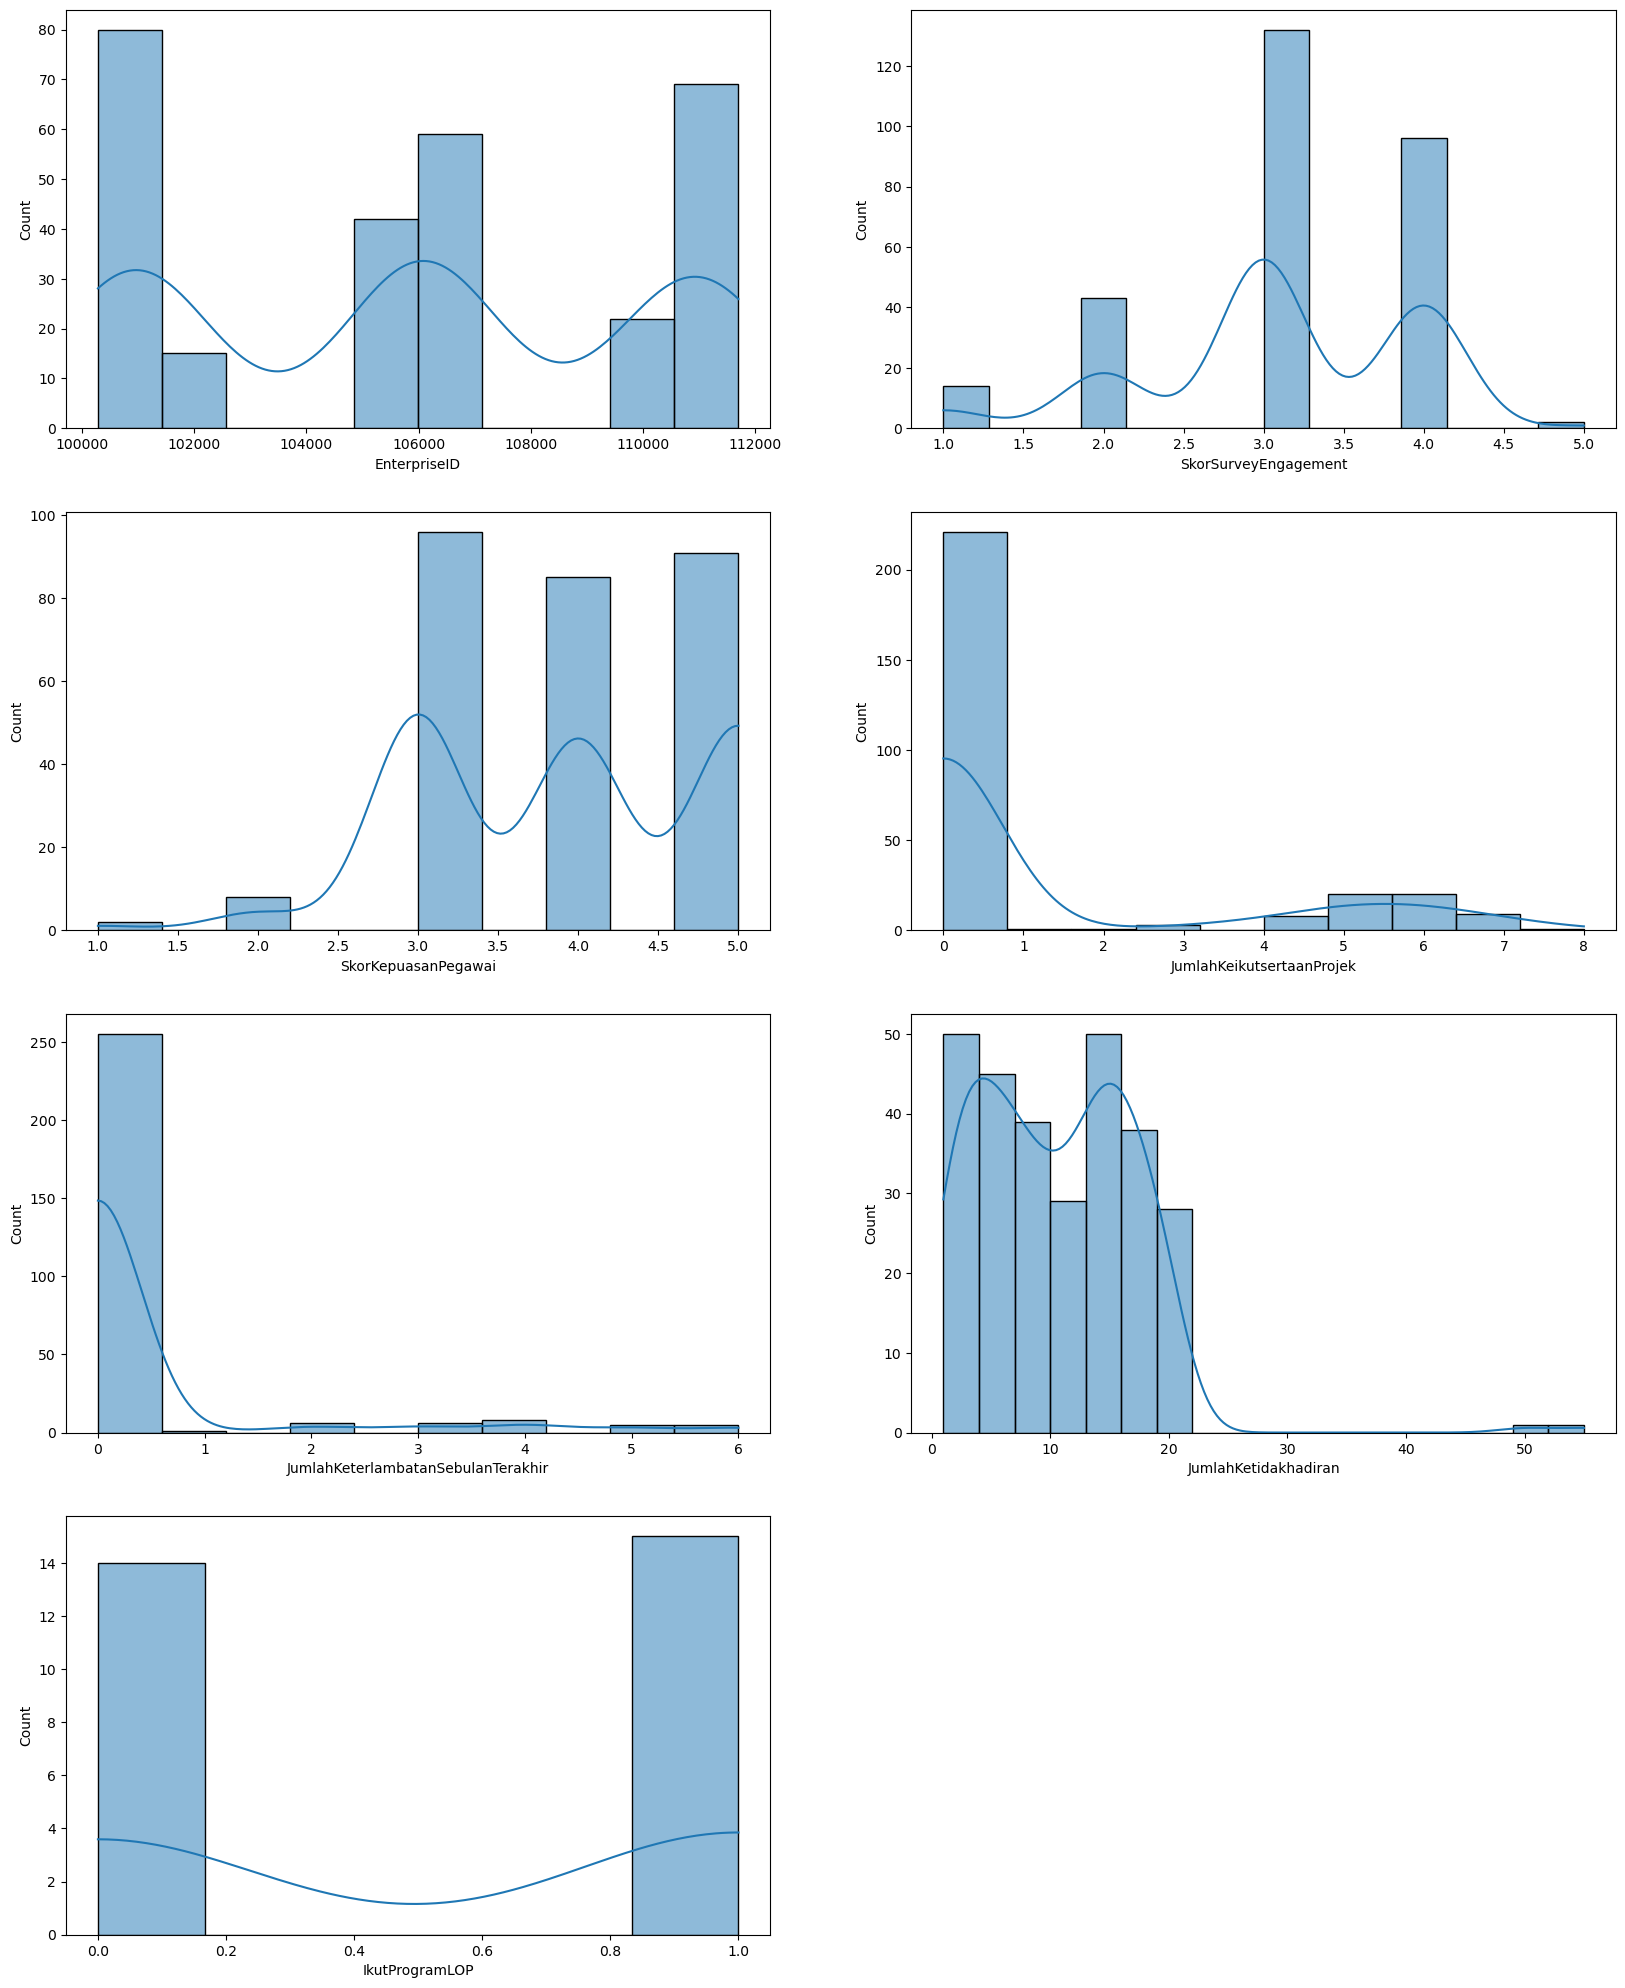

In [8]:
plt.figure(figsize=(20,25))
for i in range(len(num)) :
  plt.subplot (4,2,i+1)
  sns.histplot(data=df[num[i]], kde=True)
  plt.tight_layout
plt.show()

**Hasil analisis:**

1. EnterpriseID: Distribusi EnterpriseID cukup merata.
2. Skor Survey Engagement dan Skor Kepuasan Pegawai: Skor rata-rata menunjukkan tingkat engagement dan kepuasan yang cukup baik, namun terdapat beberapa pegawai dengan skor yang sangat rendah.
3. Jumlah Keikutsertaan Projek: Partisipasi dalam projek sangat rendah.
4. Jumlah Keterlambatan dan Ketidakhadiran: Sebagian besar pegawai tidak mengalami keterlambatan, namun ada yang mengalami keterlambatan signifikan dan ketidakhadiran yang cukup tinggi.
5. Ikut Program LOP: Program ini belum banyak diikuti oleh pegawai.

In [9]:
df[cat].describe().T

,count,unique,top,freq
Username,287,285,boredEggs0,2
StatusPernikahan,287,5,Belum_menikah,132
JenisKelamin,287,2,Wanita,167
StatusKepegawaian,287,3,FullTime,217
Pekerjaan,287,14,Software Engineer (Back End),109
JenjangKarir,287,3,Freshgraduate_program,169
PerformancePegawai,287,5,Biasa,85
AsalDaerah,287,5,Jakarta Pusat,72
HiringPlatform,287,9,Indeed,85
NomorHP,287,287,+6282232522xxx,1


In [10]:
df['TanggalResign'].value_counts()

TanggalResign
-             198
2018-04-01      9
2014-8-19       9
2018-06-08      9
2017-11-15      9
2013-5-30       4
2020-8-19       2
2014-9-24       2
2015-04-01      1
2016-01-11      1
2016-10-31      1
2017-12-15      1
2015-6-18       1
2014-04-07      1
2017-4-15       1
2015-06-05      1
2017-11-14      1
2018-9-15       1
2019-9-26       1
2017-09-05      1
2016-4-24       1
2017-06-04      1
2016-01-09      1
2017-12-12      1
2016-3-31       1
2015-4-15       1
2020-9-26       1
2020-4-29       1
2015-01-09      1
2018-11-15      1
2018-6-16       1
2018-09-06      1
2019-01-12      1
2018-9-19       1
2019-04-06      1
2019-08-04      1
2017-09-12      1
2016-04-04      1
2018-2-19       1
2016-08-07      1
2015-6-15       1
2016-08-02      1
2015-01-07      1
2013-9-26       1
2018-9-23       1
2017-11-04      1
2019-06-06      1
2020-9-27       1
2020-2-25       1
2017-3-15       1
2018-5-17       1
2015-6-24       1
2017-6-25       1
Name: count, dtype: int64

In [11]:
df[df['TanggalResign']=='-']

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,...,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1,1.0,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,...,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,1,0.0,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-
5,emptyMacaw4,106419,Belum_menikah,Wanita,Outsource,Software Engineer (Front End),Senior_level,Biasa,Jakarta Selatan,Indeed,...,+6283886053xxx,emptyMacaw4468@yahoo.com,Sarjana,1,0.0,masih_bekerja,1980-05-12,2016-10-02,2020-02-06,-
6,madZebra1,100309,Menikah,Wanita,FullTime,Data Analyst,Freshgraduate_program,Biasa,Jakarta Utara,LinkedIn,...,+6285735701xxx,madZebra1244@icloud.com,Sarjana,1,NaN,masih_bekerja,1979-05-24,2014-11-10,2020-01-02,-
7,cynicalMandrill7,110500,Belum_menikah,Pria,FullTime,Software Engineer (Back End),Senior_level,Kurang,Jakarta Selatan,LinkedIn,...,+6281293511xxx,cynicalMandrill7920@hotmail.com,Magister,1,NaN,masih_bekerja,1983-08-24,2013-07-08,2020-1-14,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,peacefulChamois3,106257,Belum_menikah,Wanita,FullTime,Product Design (UI & UX),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,...,+6282208741xxx,peacefulChamois3574@icloud.com,Doktor,1,NaN,NaN,1980-04-18,2013-07-08,2020-1-22,-
280,anxiousTeal2,111378,Belum_menikah,Wanita,FullTime,Software Engineer (Back End),Mid_level,Bagus,Jakarta Timur,Employee_Referral,...,+6289567915xxx,anxiousTeal2015@gmail.com,Sarjana,1,NaN,NaN,1984-09-16,2014-11-10,2020-01-04,-
281,anxiousWasp6,100628,Bercerai,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Sangat_bagus,Jakarta Pusat,Indeed,...,+6281806218xxx,anxiousWasp6788@outlook.com,Sarjana,1,NaN,NaN,1983-09-04,2017-2-15,2020-1-23,-
282,dopeySheep0,106034,Belum_menikah,Wanita,FullTime,Data Engineer,Mid_level,Bagus,Jakarta Pusat,Google_Search,...,+6283343465xxx,dopeySheep0297@icloud.com,Sarjana,1,NaN,NaN,1973-12-08,2011-9-26,2016-03-01,-


In [12]:
df[df['TanggalResign']=='-']['AlasanResign'].value_counts()

AlasanResign
masih_bekerja    132
Name: count, dtype: int64

In [13]:
df['TanggalResign'] = pd.to_datetime(df['TanggalResign'], errors='coerce')

C:\Users\Wika Rabila Putri\AppData\Local\Temp\ipykernel_14020\1504778335.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['TanggalResign'] = pd.to_datetime(df['TanggalResign'], errors='coerce')


In [14]:
df['TanggalHiring'] = pd.to_datetime(df['TanggalHiring'])

In [15]:
df['TanggalPenilaianKaryawan'] = pd.to_datetime(df['TanggalPenilaianKaryawan'])

In [16]:
df['TanggalLahir'] = pd.to_datetime(df['TanggalLahir'])
num = []
cat = []
date = []

for column in df :
  if df[column].dtypes in ['int64', 'float64'] :
    num.append(column)
  elif df[column].dtypes in ['datetime64[ns]']:
    date.append(column)
  else :
    cat.append(column)

print('num',num)
print('cat',cat)
print('date',date)

num ['EnterpriseID', 'SkorSurveyEngagement', 'SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran', 'IkutProgramLOP']
cat ['Username', 'StatusPernikahan', 'JenisKelamin', 'StatusKepegawaian', 'Pekerjaan', 'JenjangKarir', 'PerformancePegawai', 'AsalDaerah', 'HiringPlatform', 'NomorHP', 'Email', 'TingkatPendidikan', 'PernahBekerja', 'AlasanResign']
date ['TanggalLahir', 'TanggalHiring', 'TanggalPenilaianKaryawan', 'TanggalResign']


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Username                            287 non-null    object        
 1   EnterpriseID                        287 non-null    int64         
 2   StatusPernikahan                    287 non-null    object        
 3   JenisKelamin                        287 non-null    object        
 4   StatusKepegawaian                   287 non-null    object        
 5   Pekerjaan                           287 non-null    object        
 6   JenjangKarir                        287 non-null    object        
 7   PerformancePegawai                  287 non-null    object        
 8   AsalDaerah                          287 non-null    object        
 9   HiringPlatform                      287 non-null    object        
 10  SkorSurveyEngagement      

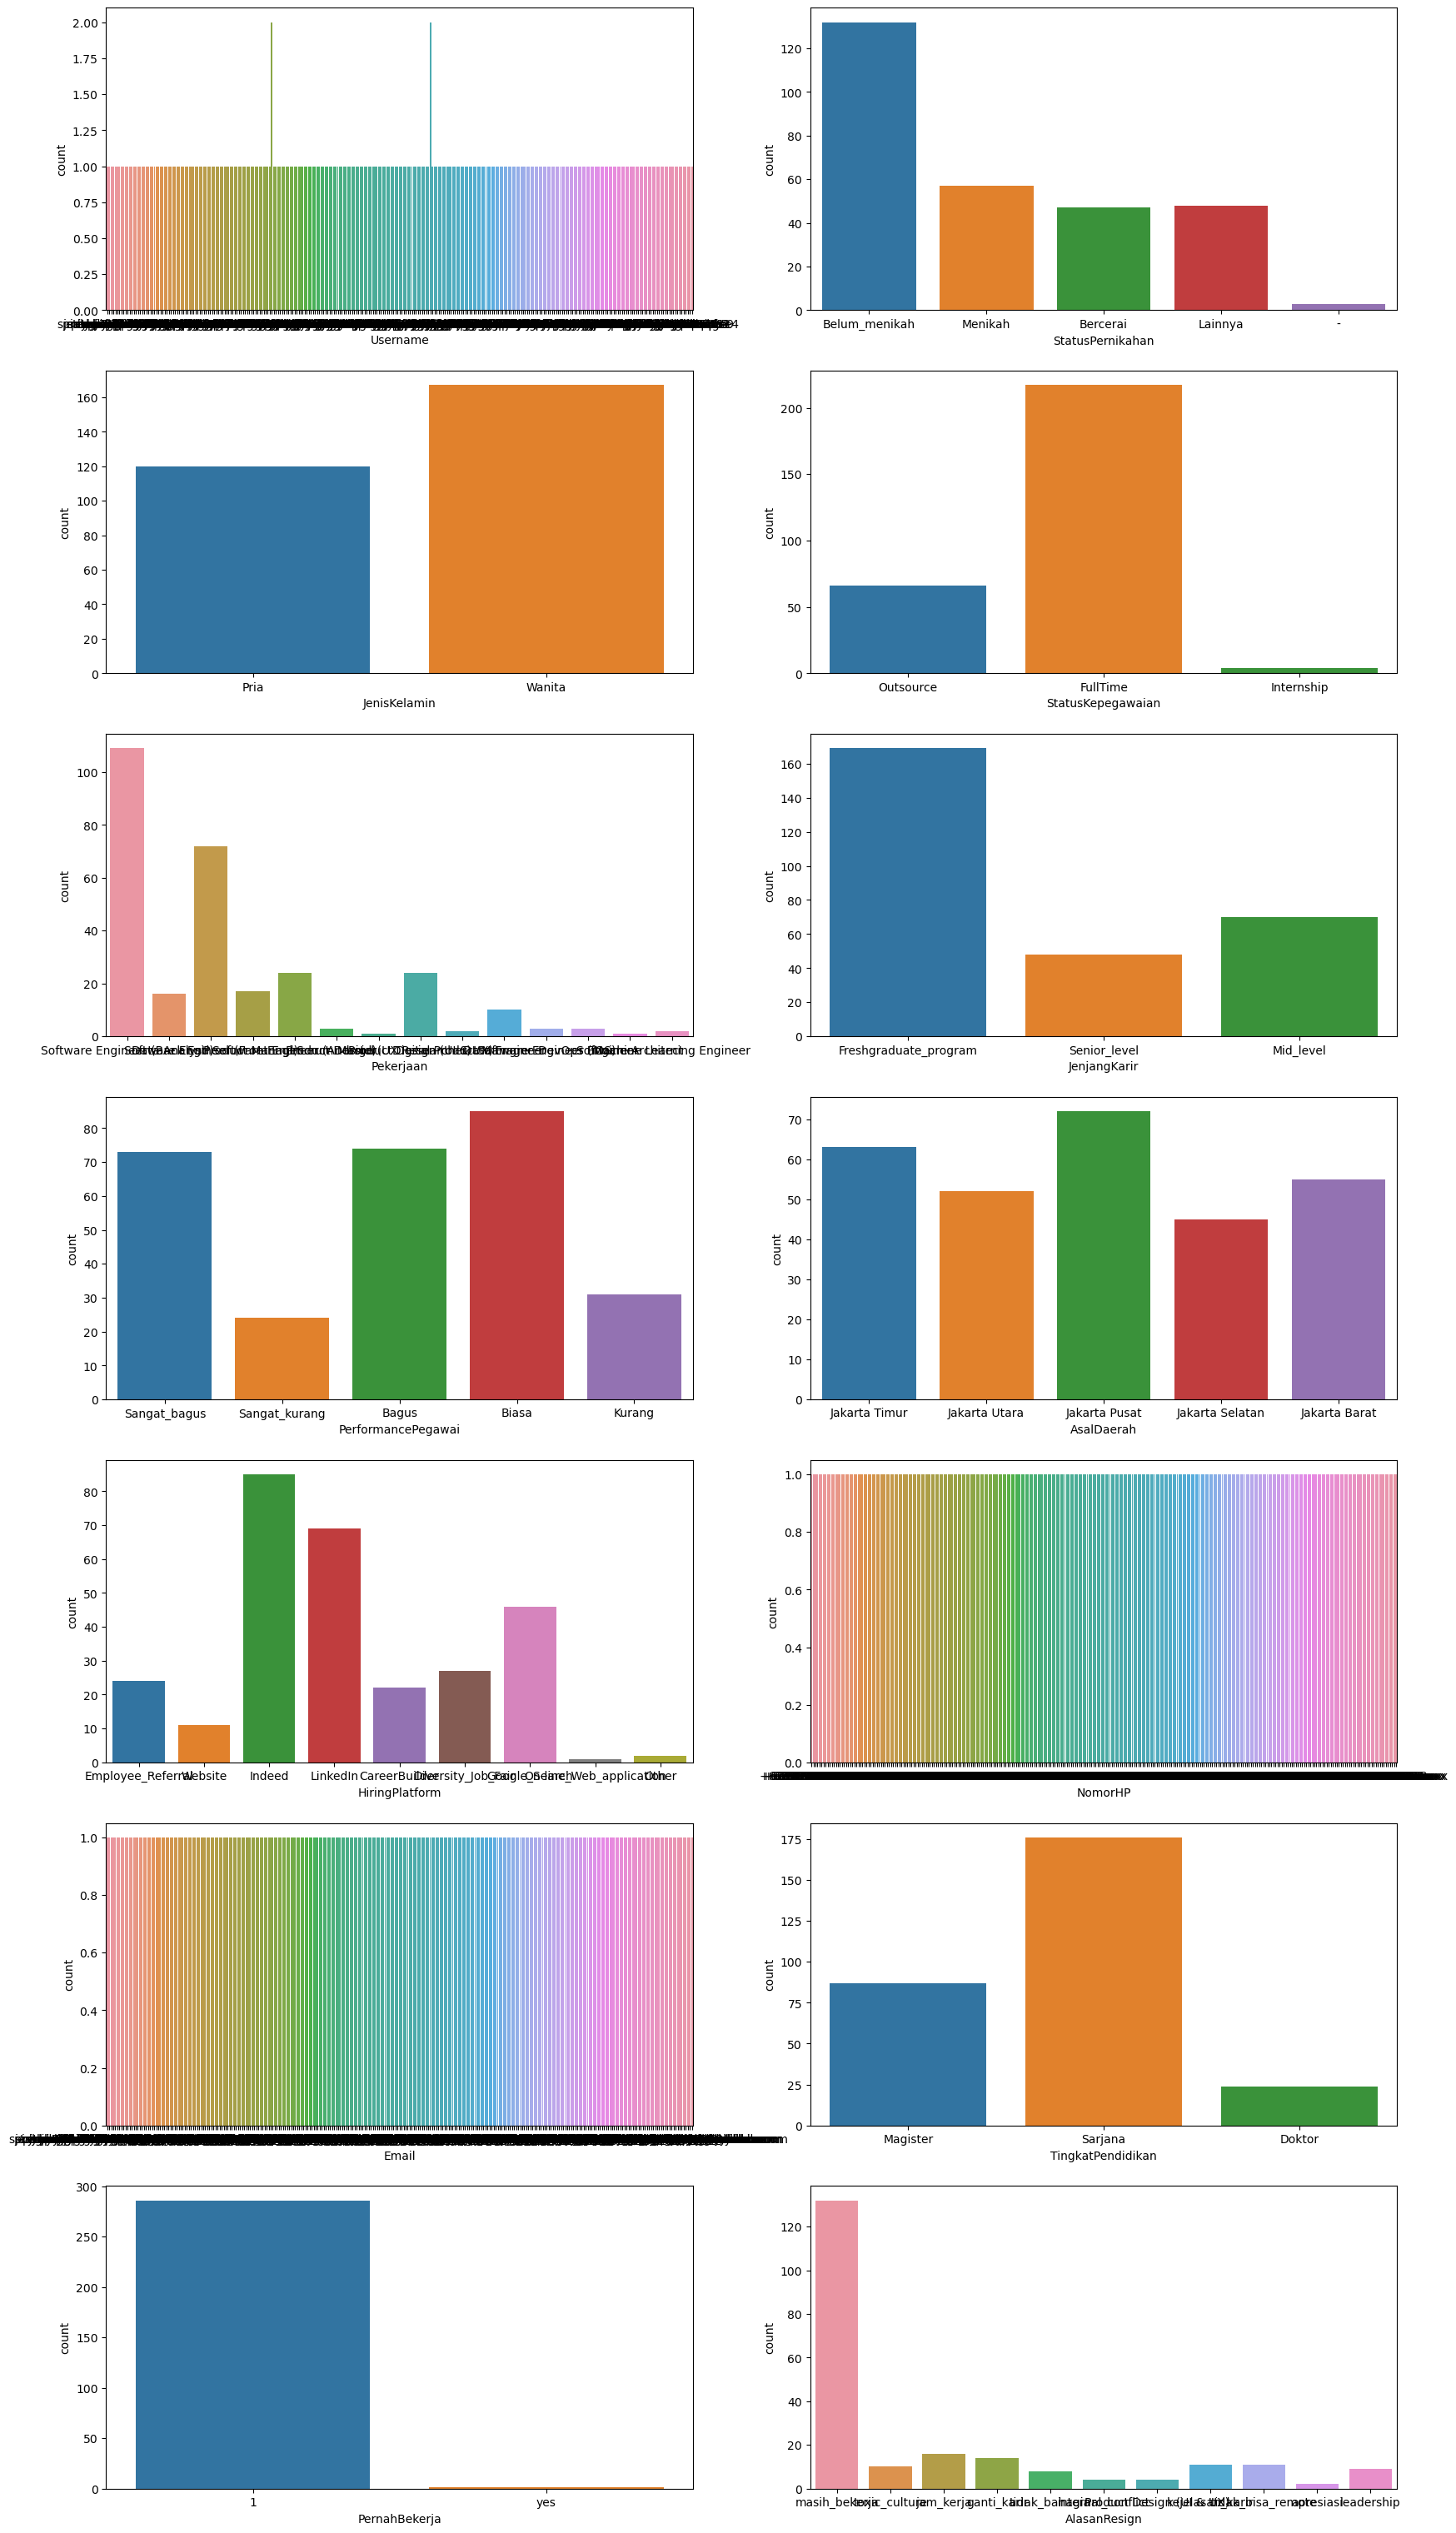

In [18]:
plt.figure(figsize=(20,50))
for i in range(len(cat)) :
  plt.subplot (9,2,i+1)
  sns.countplot(data=df, x = cat[i])
  plt.tight_layout
plt.show()

**Hasil analisis:**

Mayoritas pegawai perusahaan adalah wanita yang belum menikah dan bekerja full-time sebagai Software Engineer (Back End), dengan sebagian besar berasal dari Jakarta Pusat, berpendidikan sarjana, dan direkrut melalui platform Indeed.

In [19]:
df['PernahBekerja'].value_counts()

PernahBekerja
1      286
yes      1
Name: count, dtype: int64

In [20]:
df['PernahBekerja'] = df['PernahBekerja'].replace(1,'yes')

In [21]:
df['PernahBekerja'].value_counts()

PernahBekerja
1      286
yes      1
Name: count, dtype: int64

In [22]:
df['Resigned'] = np.where(df['TanggalResign'].isna(),0,1)

In [23]:
#mengubah tipe data kolom PernahBekerja menjadi string
df['PernahBekerja'] = df['PernahBekerja'].astype(str)

#mengubah nilai dalam kolom PernahBekerja menjadi 'yes'
df['PernahBekerja'] = df['PernahBekerja'].replace('1', 'yes')

print(df['PernahBekerja'].value_counts())

PernahBekerja
yes    287
Name: count, dtype: int64


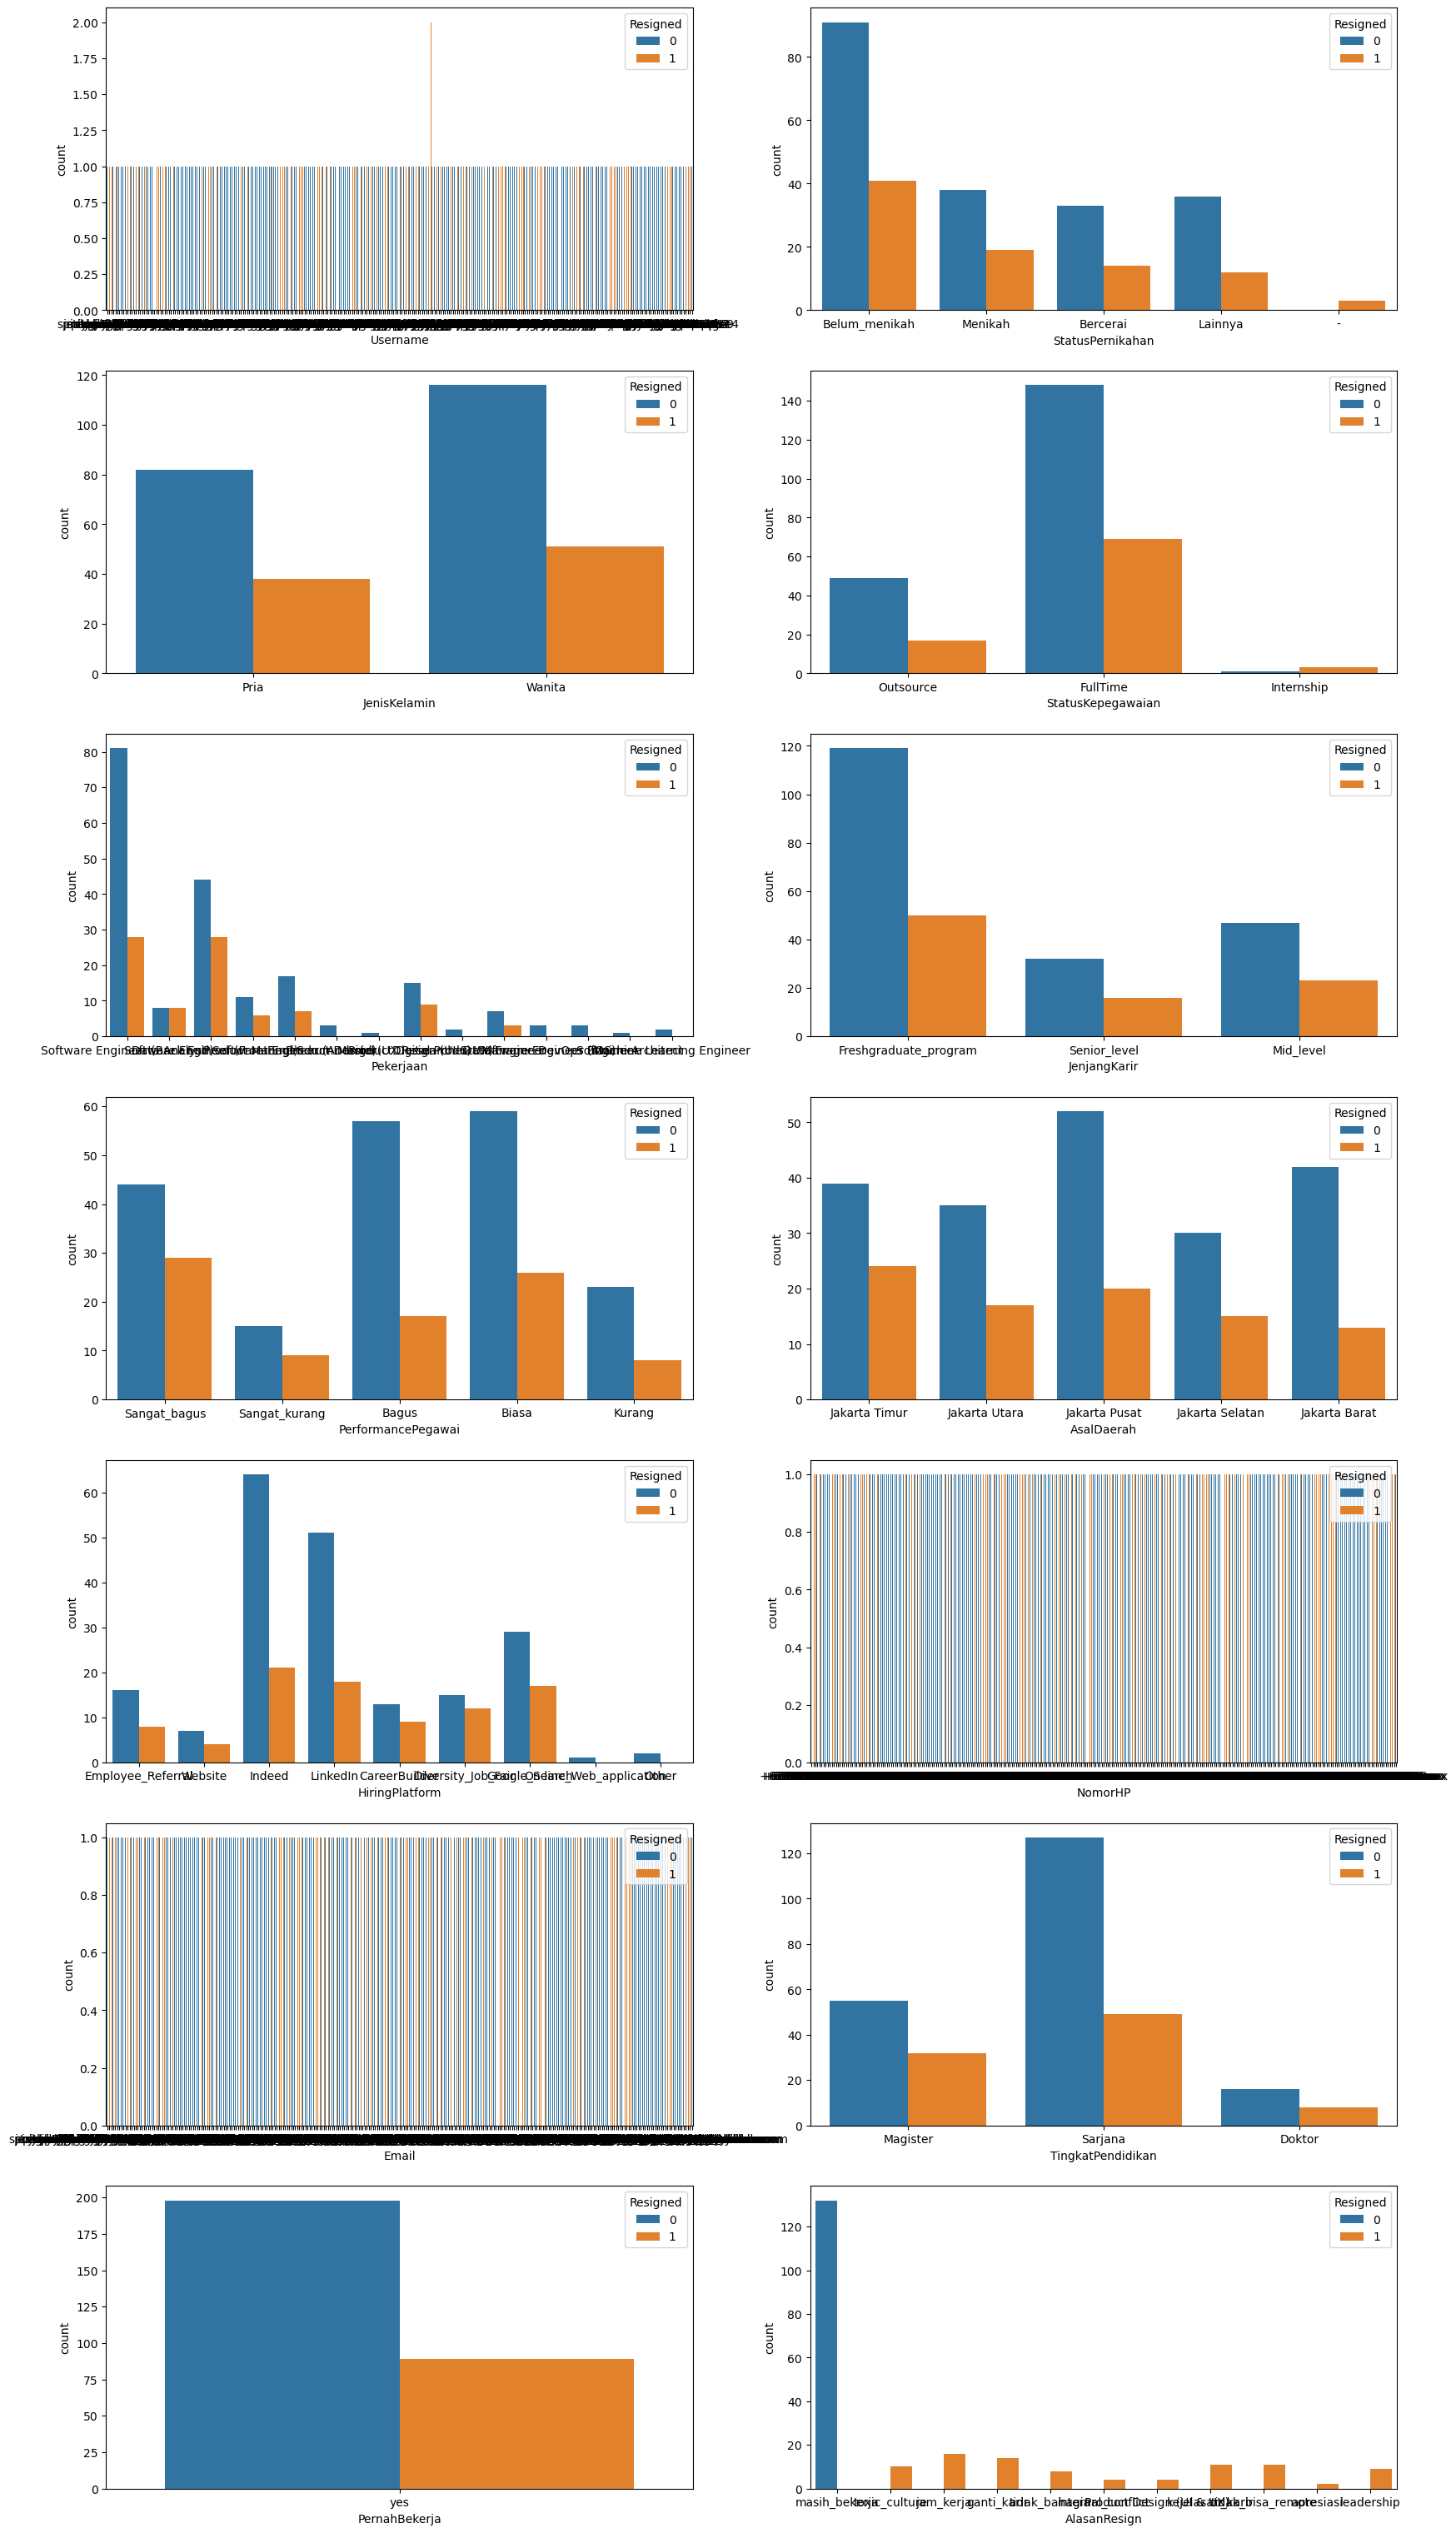

In [24]:
plt.figure(figsize=(20,50))
for i in range(len(cat)) :
  plt.subplot (9,2,i+1)
  sns.countplot(data=df, x = cat[i], hue = 'Resigned')
  plt.tight_layout
plt.show()

In [25]:
df_copy = df

In [26]:
df_copy.isna().sum()

Username                                0
EnterpriseID                            0
StatusPernikahan                        0
JenisKelamin                            0
StatusKepegawaian                       0
Pekerjaan                               0
JenjangKarir                            0
PerformancePegawai                      0
AsalDaerah                              0
HiringPlatform                          0
SkorSurveyEngagement                    0
SkorKepuasanPegawai                     5
JumlahKeikutsertaanProjek               3
JumlahKeterlambatanSebulanTerakhir      1
JumlahKetidakhadiran                    6
NomorHP                                 0
Email                                   0
TingkatPendidikan                       0
PernahBekerja                           0
IkutProgramLOP                        258
AlasanResign                           66
TanggalLahir                            0
TanggalHiring                           0
TanggalPenilaianKaryawan          

In [27]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Username                            287 non-null    object        
 1   EnterpriseID                        287 non-null    int64         
 2   StatusPernikahan                    287 non-null    object        
 3   JenisKelamin                        287 non-null    object        
 4   StatusKepegawaian                   287 non-null    object        
 5   Pekerjaan                           287 non-null    object        
 6   JenjangKarir                        287 non-null    object        
 7   PerformancePegawai                  287 non-null    object        
 8   AsalDaerah                          287 non-null    object        
 9   HiringPlatform                      287 non-null    object        
 10  SkorSurveyEngagement      

**Hasil analisis:**

1. Data terdiri dari 287 entries dan 26 fitur/kolom.
2. Terdapat missing values pada:
    - SkorKepuasanPegawai = 5
    - JumlahKeikutsertaanProjek = 3
    - JumlahKeterlambatanSebulanTerakhir = 1
    - JumlahKetidakhadiran = 6
    - IkutProgramLOP = 258
    - AlasanResign = 66
3. Tidak ada data yang duplikat

## Handle Missing Values

jumlah null values:

- SkorKepuasanPegawai                    = 5
- JumlahKeikutsertaanProjek              = 3
- JumlahKeterlambatanSebulanTerakhir     = 1
- JumlahKetidakhadiran                   = 6
- IkutProgramLOP                       = 258
- AlasanResign                          = 66

In [28]:
df_copy['SkorKepuasanPegawai'].value_counts()
df_copy['SkorKepuasanPegawai'].quantile(.5)
df_copy['SkorKepuasanPegawai'] = df_copy['SkorKepuasanPegawai'].fillna(4)

In [29]:
df_copy['JumlahKeikutsertaanProjek'].value_counts()
df_copy['JumlahKeikutsertaanProjek'] = df_copy['JumlahKeikutsertaanProjek'].fillna(0)

In [30]:
df_copy['JumlahKeterlambatanSebulanTerakhir'].value_counts()
df_copy['JumlahKeterlambatanSebulanTerakhir'] = df_copy['JumlahKeterlambatanSebulanTerakhir'].fillna(0)

In [31]:
df_copy['JumlahKetidakhadiran'].value_counts()
df_copy['JumlahKetidakhadiran'] = df_copy['JumlahKetidakhadiran'].fillna(0)

In [32]:
df_copy['IkutProgramLOP'].value_counts()
df_copy['IkutProgramLOP'] = df_copy['IkutProgramLOP'].fillna(0)

In [33]:
df_copy['AlasanResign'].value_counts()

AlasanResign
masih_bekerja               132
jam_kerja                    16
ganti_karir                  14
kejelasan_karir              11
tidak_bisa_remote            11
toxic_culture                10
leadership                    9
tidak_bahagia                 8
internal_conflict             4
Product Design (UI & UX)      4
apresiasi                     2
Name: count, dtype: int64

In [34]:
df_copy[df_copy['AlasanResign'].isna()]['Resigned'].value_counts()

Resigned
0    66
Name: count, dtype: int64

In [35]:
df_copy[df_copy['AlasanResign']=='masih_bekerja']['Resigned'].value_counts()

Resigned
0    132
Name: count, dtype: int64

In [36]:
df_copy['AlasanResign'] = df_copy['AlasanResign'].fillna('masih_bekerja')

In [37]:
df_copy.isna().sum()

Username                                0
EnterpriseID                            0
StatusPernikahan                        0
JenisKelamin                            0
StatusKepegawaian                       0
Pekerjaan                               0
JenjangKarir                            0
PerformancePegawai                      0
AsalDaerah                              0
HiringPlatform                          0
SkorSurveyEngagement                    0
SkorKepuasanPegawai                     0
JumlahKeikutsertaanProjek               0
JumlahKeterlambatanSebulanTerakhir      0
JumlahKetidakhadiran                    0
NomorHP                                 0
Email                                   0
TingkatPendidikan                       0
PernahBekerja                           0
IkutProgramLOP                          0
AlasanResign                            0
TanggalLahir                            0
TanggalHiring                           0
TanggalPenilaianKaryawan          

In [38]:
#menghapus fitur

df_copy1 = df_copy.drop(columns='PernahBekerja')

In [39]:
df_copy1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Username                            287 non-null    object        
 1   EnterpriseID                        287 non-null    int64         
 2   StatusPernikahan                    287 non-null    object        
 3   JenisKelamin                        287 non-null    object        
 4   StatusKepegawaian                   287 non-null    object        
 5   Pekerjaan                           287 non-null    object        
 6   JenjangKarir                        287 non-null    object        
 7   PerformancePegawai                  287 non-null    object        
 8   AsalDaerah                          287 non-null    object        
 9   HiringPlatform                      287 non-null    object        
 10  SkorSurveyEngagement      

In [40]:
#ubah tipe data
df_copy1['Resigned'] = df_copy1['Resigned'].astype('int64')

## Multivariate Analysis

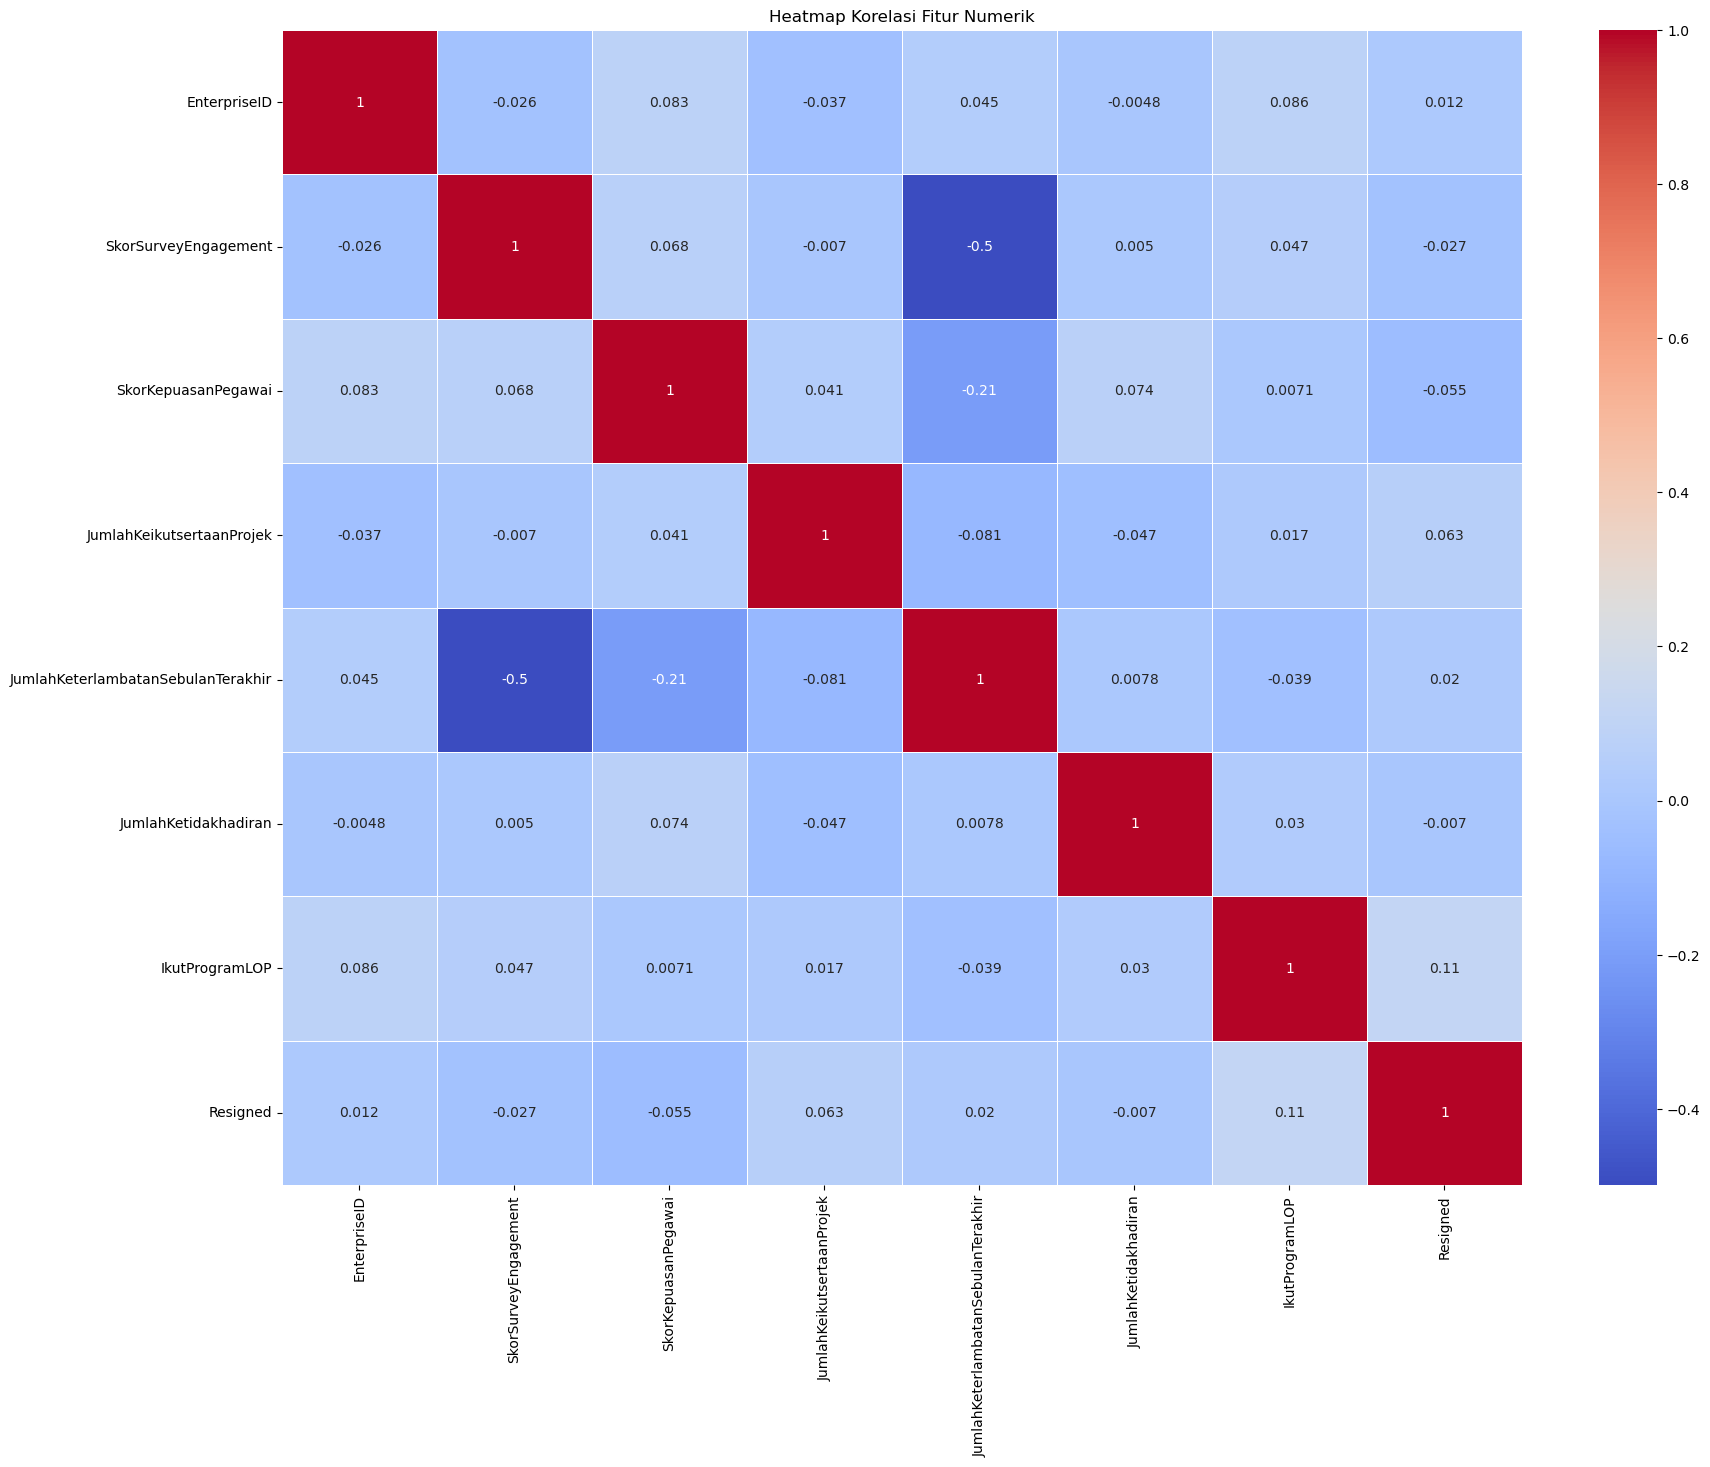

In [41]:
numerical_features = df_copy1.select_dtypes(include=['float64', 'int64'])

#menghitung korelasi
correlation_matrix = numerical_features.corr()

#membuat heatmap
plt.subplots(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Fitur Numerik')
plt.show()

**Hasil analisis:**


# TASK 2: Annual Report on Employee Number Changes

In [42]:
#menambahkan fitur 'TahunHiring':
df_copy1['TahunHiring'] = df_copy1['TanggalHiring'].dt.year

#ubah tipe data
df_copy1['TahunHiring'] = df_copy1['TahunHiring'].astype('int64')

#menambahkan fitur 'TahunResign':
df_copy1['TahunResign'] = df_copy1['TanggalResign'].dt.year

In [43]:
df_copy1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Username                            287 non-null    object        
 1   EnterpriseID                        287 non-null    int64         
 2   StatusPernikahan                    287 non-null    object        
 3   JenisKelamin                        287 non-null    object        
 4   StatusKepegawaian                   287 non-null    object        
 5   Pekerjaan                           287 non-null    object        
 6   JenjangKarir                        287 non-null    object        
 7   PerformancePegawai                  287 non-null    object        
 8   AsalDaerah                          287 non-null    object        
 9   HiringPlatform                      287 non-null    object        
 10  SkorSurveyEngagement      

In [44]:
#menunjukkan jumlah karyawan yang direkrut setiap tahun

annual_hiring = df_copy1[['TahunHiring','EnterpriseID']].groupby('TahunHiring').agg({'EnterpriseID':'count'}).reset_index().rename(columns={'TahunHiring':'Tahun','EnterpriseID':'JumlahHiring'})
annual_hiring

,Tahun,JumlahHiring
0,2006,1
1,2007,2
2,2008,2
3,2009,7
4,2010,8
5,2011,76
6,2012,41
7,2013,43
8,2014,56
9,2015,31


In [45]:
#menunjukkan jumlah karyawan yang mengundurkan diri pada setiap tahun 

annual_resign = df_copy1[['TahunResign','EnterpriseID']].groupby('TahunResign').agg({'EnterpriseID':'count'}).reset_index().rename(columns={'TahunResign':'Tahun','EnterpriseID':'JumlahResign'})

#mengubah tipe data Tahun dari float ke integer
annual_resign['Tahun'] = annual_resign['Tahun'].astype(int)

annual_resign

,Tahun,JumlahResign
0,2013,5
1,2014,12
2,2015,8
3,2016,8
4,2017,19
5,2018,26
6,2019,5
7,2020,6


In [46]:
#menggabungkan informasi tentang perekrutan dan pengunduran diri karyawan berdasarkan tahun
annual_turnover = annual_hiring.merge(annual_resign, how='left', on = 'Tahun')

#mengisi NaN dengan 0
annual_turnover['JumlahResign'] = annual_turnover['JumlahResign'].fillna(0)

annual_turnover

,Tahun,JumlahHiring,JumlahResign
0,2006,1,0.0
1,2007,2,0.0
2,2008,2,0.0
3,2009,7,0.0
4,2010,8,0.0
5,2011,76,0.0
6,2012,41,0.0
7,2013,43,5.0
8,2014,56,12.0
9,2015,31,8.0


In [47]:
#menghitung perubahan karyawan tahunan
annual_turnover['PerubahanKaryawan'] = annual_turnover['JumlahHiring'] - annual_turnover['JumlahResign']

In [48]:
#inisialisasi vr
total_karyawan = 0
list_jumlah_karyawan = []

#menghitung kumulatif total karyawan
for i in range(len(annual_turnover)):
  total_karyawan += annual_turnover['PerubahanKaryawan'][i]
  list_jumlah_karyawan.append(total_karyawan)
print(list_jumlah_karyawan)

[1.0, 3.0, 5.0, 12.0, 20.0, 96.0, 137.0, 175.0, 219.0, 242.0, 248.0, 234.0, 209.0]


In [49]:
#menambahkan fitur TotalKaryawan
annual_turnover['TotalKaryawan'] = list_jumlah_karyawan
annual_turnover

,Tahun,JumlahHiring,JumlahResign,PerubahanKaryawan,TotalKaryawan
0,2006,1,0.0,1.0,1.0
1,2007,2,0.0,2.0,3.0
2,2008,2,0.0,2.0,5.0
3,2009,7,0.0,7.0,12.0
4,2010,8,0.0,8.0,20.0
5,2011,76,0.0,76.0,96.0
6,2012,41,0.0,41.0,137.0
7,2013,43,5.0,38.0,175.0
8,2014,56,12.0,44.0,219.0
9,2015,31,8.0,23.0,242.0


In [50]:
#inisialisasi vr
total_hiring = 0
list_total_hiring = []

#menghitung kumulatif total perekrutan
for i in range(len(annual_turnover)):
  total_hiring += annual_turnover['JumlahHiring'][i]
  list_total_hiring.append(total_hiring)
    
#menambahkan fitur TotalHiring
annual_turnover['TotalHiring'] = list_total_hiring

In [51]:
##inisialisasi vr
total_resign = 0
list_total_resign = []

##menghitung kumulatif total pengunduran diri
for i in range(len(annual_turnover)):
  total_resign += annual_turnover['JumlahResign'][i]
  list_total_resign.append(total_resign)
    
#menambahkan fitur TotalResign
annual_turnover['TotalResign'] = list_total_resign

In [52]:
annual_turnover

,Tahun,JumlahHiring,JumlahResign,PerubahanKaryawan,TotalKaryawan,TotalHiring,TotalResign
0,2006,1,0.0,1.0,1.0,1,0.0
1,2007,2,0.0,2.0,3.0,3,0.0
2,2008,2,0.0,2.0,5.0,5,0.0
3,2009,7,0.0,7.0,12.0,12,0.0
4,2010,8,0.0,8.0,20.0,20,0.0
5,2011,76,0.0,76.0,96.0,96,0.0
6,2012,41,0.0,41.0,137.0,137,0.0
7,2013,43,5.0,38.0,175.0,180,5.0
8,2014,56,12.0,44.0,219.0,236,17.0
9,2015,31,8.0,23.0,242.0,267,25.0


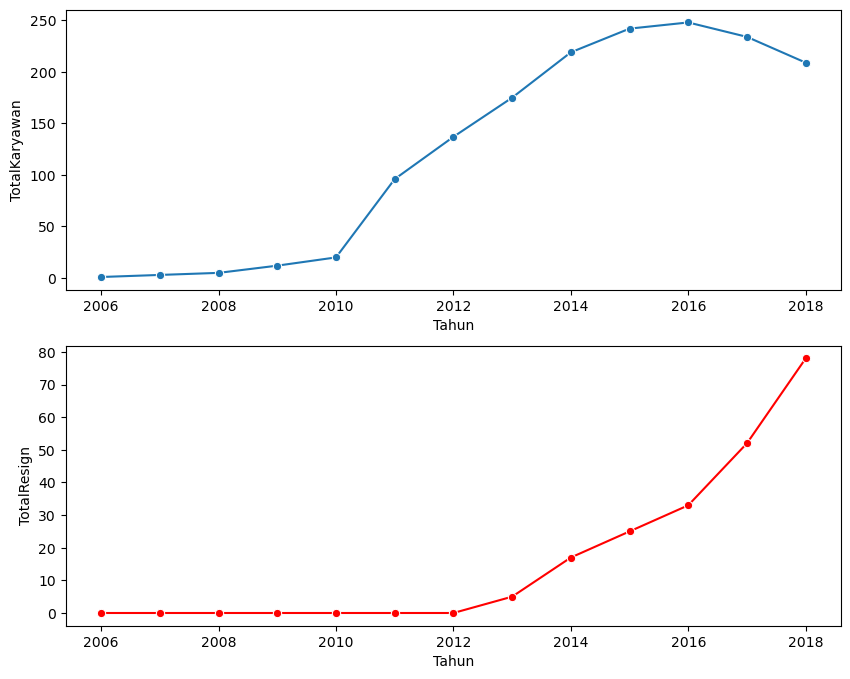

In [53]:
#visualisasi 

plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
sns.lineplot(data = annual_turnover, x ='Tahun', y = 'TotalKaryawan', marker = 'o')
plt.subplot(2,1,2)
sns.lineplot(data = annual_turnover, x ='Tahun', y = 'TotalResign', marker = 'o', color='Red')
plt.show()

**Hasil analisis:**

1. Periode Pertumbuhan Pesat (2006-2012): Periode ini menunjukkan pertumbuhan yang cepat dan stabil tanpa adanya pengunduran diri yang signifikan.
2. Periode Stabilitas dan Tantangan (2013-2018): Setelah tahun 2012, perusahaan mulai menghadapi tantangan dengan meningkatnya jumlah pengunduran diri. Tahun 2017 dan 2018 sangat kritis karena jumlah pengunduran diri melebihi jumlah perekrutan, yang menyebabkan penurunan total karyawan.
3. Fokus pada Retensi Karyawan: Untuk menjaga stabilitas dan pertumbuhan perusahaan, penting untuk fokus pada strategi retensi karyawan, terutama setelah melihat tren pengunduran diri yang meningkat pada periode akhir.

# TASK 3: Resign Reason Analysis for Employee Attrition Management Strategy

In [54]:
df_copy1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Username                            287 non-null    object        
 1   EnterpriseID                        287 non-null    int64         
 2   StatusPernikahan                    287 non-null    object        
 3   JenisKelamin                        287 non-null    object        
 4   StatusKepegawaian                   287 non-null    object        
 5   Pekerjaan                           287 non-null    object        
 6   JenjangKarir                        287 non-null    object        
 7   PerformancePegawai                  287 non-null    object        
 8   AsalDaerah                          287 non-null    object        
 9   HiringPlatform                      287 non-null    object        
 10  SkorSurveyEngagement      

In [55]:
df_copy1.sample(5)

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,TingkatPendidikan,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,Resigned,TahunHiring,TahunResign
146,ferventAbalone7,105357,Belum_menikah,Wanita,FullTime,Product Design (UI & UX),Senior_level,Bagus,Jakarta Timur,Employee_Referral,...,Sarjana,0.0,tidak_bahagia,1966-04-17,2016-07-21,2020-01-14,2018-04-01,1,2016,2018.0
274,affectedPup0,100718,Belum_menikah,Wanita,FullTime,Software Engineer (Front End),Senior_level,Kurang,Jakarta Barat,LinkedIn,...,Magister,0.0,leadership,1987-09-27,2014-02-17,2020-01-07,2017-11-15,1,2014,2017.0
38,peskyTeal7,110552,Belum_menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Sangat_bagus,Jakarta Pusat,Indeed,...,Sarjana,0.0,masih_bekerja,1983-03-19,2009-01-05,2020-02-04,NaT,0,2009,NaN
186,aloofChile5,105458,Belum_menikah,Pria,FullTime,Software Engineer (Back End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,...,Sarjana,0.0,masih_bekerja,1983-08-09,2016-01-28,2020-02-22,NaT,0,2016,NaN
8,lyingMussel8,110533,Bercerai,Pria,FullTime,Software Engineer (Android),Senior_level,Sangat_kurang,Jakarta Selatan,Employee_Referral,...,Magister,0.0,masih_bekerja,1980-08-26,2016-07-06,2020-02-28,NaT,0,2016,NaN


In [56]:
#memisahkan data karyawan yang mengundurkan diri
resign_data = df[df['Resigned']==1][['Pekerjaan', 'EnterpriseID']].groupby('Pekerjaan').agg({'EnterpriseID':'count'}).reset_index().rename(columns={'EnterpriseID':'JumlahResign'})

#memisahkan data karyawan yang belum mengundurkan diri
unresign_data =df[df['Resigned']==0][['Pekerjaan', 'EnterpriseID']].groupby('Pekerjaan').agg({'EnterpriseID':'count'}).reset_index().rename(columns={'EnterpriseID':'JumlahTidakResign'})

In [57]:
resign_data

,Pekerjaan,JumlahResign
0,Data Analyst,8
1,Data Engineer,3
2,Product Design (UI & UX),9
3,Product Manager,6
4,Software Engineer (Android),7
5,Software Engineer (Back End),28
6,Software Engineer (Front End),28


In [58]:
unresign_data

,Pekerjaan,JumlahTidakResign
0,Data Analyst,8
1,Data Engineer,7
2,DevOps Engineer,3
3,Digital Product Manager,2
4,Machine Learning Engineer,2
5,Product Design (UI & UX),15
6,Product Design (UX Researcher),1
7,Product Manager,11
8,Scrum Master,3
9,Software Architect,1


In [59]:
merge_job_data = unresign_data.merge(resign_data, how='outer', on='Pekerjaan')
merge_job_data = merge_job_data.fillna(0)
merge_job_data

,Pekerjaan,JumlahTidakResign,JumlahResign
0,Data Analyst,8,8.0
1,Data Engineer,7,3.0
2,DevOps Engineer,3,0.0
3,Digital Product Manager,2,0.0
4,Machine Learning Engineer,2,0.0
5,Product Design (UI & UX),15,9.0
6,Product Design (UX Researcher),1,0.0
7,Product Manager,11,6.0
8,Scrum Master,3,0.0
9,Software Architect,1,0.0


In [60]:
merge_job_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pekerjaan          14 non-null     object 
 1   JumlahTidakResign  14 non-null     int64  
 2   JumlahResign       14 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 468.0+ bytes


In [61]:
merge_job_data['JumlahResign'] = merge_job_data['JumlahResign'].astype('int64')
merge_job_data

,Pekerjaan,JumlahTidakResign,JumlahResign
0,Data Analyst,8,8
1,Data Engineer,7,3
2,DevOps Engineer,3,0
3,Digital Product Manager,2,0
4,Machine Learning Engineer,2,0
5,Product Design (UI & UX),15,9
6,Product Design (UX Researcher),1,0
7,Product Manager,11,6
8,Scrum Master,3,0
9,Software Architect,1,0


In [62]:
merge_job_data['TotalEmployee'] = merge_job_data['JumlahResign'] + merge_job_data['JumlahTidakResign']
merge_job_data

,Pekerjaan,JumlahTidakResign,JumlahResign,TotalEmployee
0,Data Analyst,8,8,16
1,Data Engineer,7,3,10
2,DevOps Engineer,3,0,3
3,Digital Product Manager,2,0,2
4,Machine Learning Engineer,2,0,2
5,Product Design (UI & UX),15,9,24
6,Product Design (UX Researcher),1,0,1
7,Product Manager,11,6,17
8,Scrum Master,3,0,3
9,Software Architect,1,0,1


In [63]:
merge_job_data['PersentaseTidakResign'] = ((merge_job_data['JumlahTidakResign']/merge_job_data['TotalEmployee'])*100).round(2)

merge_job_data = merge_job_data.sort_values(by='PersentaseTidakResign', ascending= False).reset_index(drop=True)
     

merge_job_data

,Pekerjaan,JumlahTidakResign,JumlahResign,TotalEmployee,PersentaseTidakResign
0,DevOps Engineer,3,0,3,100.00
1,Digital Product Manager,2,0,2,100.00
2,Machine Learning Engineer,2,0,2,100.00
3,Product Design (UX Researcher),1,0,1,100.00
4,Scrum Master,3,0,3,100.00
5,Software Architect,1,0,1,100.00
6,Software Engineer (iOS),3,0,3,100.00
7,Software Engineer (Back End),81,28,109,74.31
8,Software Engineer (Android),17,7,24,70.83
9,Data Engineer,7,3,10,70.00


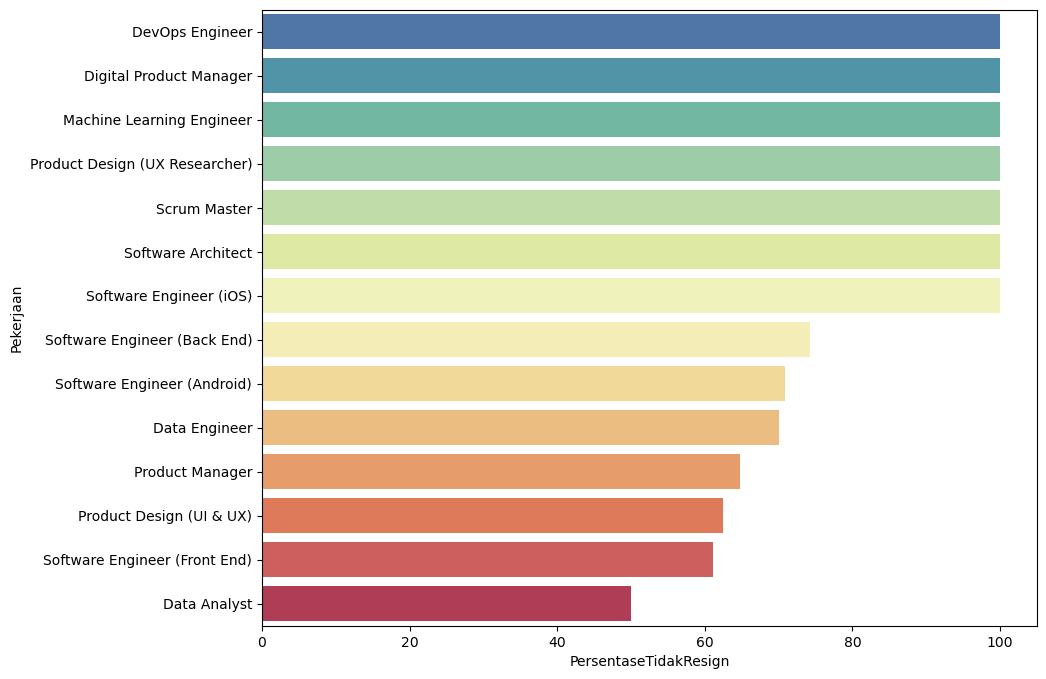

In [64]:
plt.figure(figsize=(10,8))
sns.barplot(data=merge_job_data, y='Pekerjaan', x='PersentaseTidakResign', orient='h', palette='Spectral_r')
plt.show()

**Hasil analisis:**

- Peran seperti Software Engineer (Back End) dan Software Engineer (Android) menunjukkan bahwa meskipun jumlah karyawan yang resign cukup signifikan, mayoritas tetap berada di perusahaan.
- Data Analyst memiliki tingkat retensi yang paling rendah, menunjukkan adanya masalah yang perlu segera diatasi.

In [65]:
data_analyst_resign = df_copy1[(df_copy1['Pekerjaan']=='Data Analyst') & (df_copy1['Resigned']==1)]
data_analyst_resign

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,TingkatPendidikan,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,Resigned,TahunHiring,TahunResign
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,...,Sarjana,1.0,toxic_culture,1984-04-26,2014-01-06,2020-01-17,2018-06-16,1,2014,2018.0
18,hushedSeahorse7,111202,Bercerai,Wanita,FullTime,Data Analyst,Freshgraduate_program,Sangat_bagus,Jakarta Pusat,Diversity_Job_Fair,...,Sarjana,1.0,internal_conflict,1968-05-30,2012-04-02,2017-02-05,2017-09-12,1,2012,2017.0
86,sincereGatorade8,111089,Menikah,Wanita,Outsource,Data Analyst,Freshgraduate_program,Sangat_bagus,Jakarta Timur,Indeed,...,Sarjana,0.0,toxic_culture,1987-06-14,2016-10-02,2020-01-08,2017-03-15,1,2016,2017.0
102,brainyFish3,111083,Menikah,Pria,Outsource,Data Analyst,Freshgraduate_program,Sangat_bagus,Jakarta Barat,Google_Search,...,Sarjana,0.0,toxic_culture,1984-05-09,2012-04-02,2014-02-20,2018-06-08,1,2012,2018.0
106,troubledThrushe9,101192,-,Wanita,FullTime,Data Analyst,Freshgraduate_program,Bagus,Jakarta Barat,CareerBuilder,...,Sarjana,0.0,toxic_culture,1987-01-07,2013-01-07,2020-01-30,2014-08-19,1,2013,2014.0
108,jealousIguana3,111209,Belum_menikah,Wanita,FullTime,Data Analyst,Freshgraduate_program,Biasa,Jakarta Timur,CareerBuilder,...,Sarjana,0.0,toxic_culture,1976-09-22,2015-03-30,2020-01-21,2014-08-19,1,2015,2014.0
233,jumpyBuck8,100317,Belum_menikah,Wanita,FullTime,Data Analyst,Freshgraduate_program,Sangat_bagus,Jakarta Utara,Diversity_Job_Fair,...,Magister,0.0,toxic_culture,1970-02-11,2009-07-06,2020-01-25,2015-06-05,1,2009,2015.0
239,finickySwift5,105296,Belum_menikah,Wanita,Outsource,Data Analyst,Freshgraduate_program,Biasa,Jakarta Utara,Google_Search,...,Magister,0.0,internal_conflict,1989-09-08,2011-07-11,2017-02-01,2017-06-25,1,2011,2017.0


In [66]:
jenjang_karir_data_analyst_resign = data_analyst_resign[['JenjangKarir','EnterpriseID']].groupby('JenjangKarir').agg({'EnterpriseID':'count'}).reset_index().rename(columns={'EnterpriseID':'JumlahResign'})
performa_pegawai_data_analyst_resign = data_analyst_resign[['PerformancePegawai','EnterpriseID']].groupby('PerformancePegawai').agg({'EnterpriseID':'count'}).reset_index().rename(columns={'EnterpriseID':'JumlahResign'})
alasan_resign_data_analyst_resign = data_analyst_resign[['AlasanResign','EnterpriseID']].groupby('AlasanResign').agg({'EnterpriseID':'count'}).reset_index().rename(columns={'EnterpriseID':'JumlahResign'})

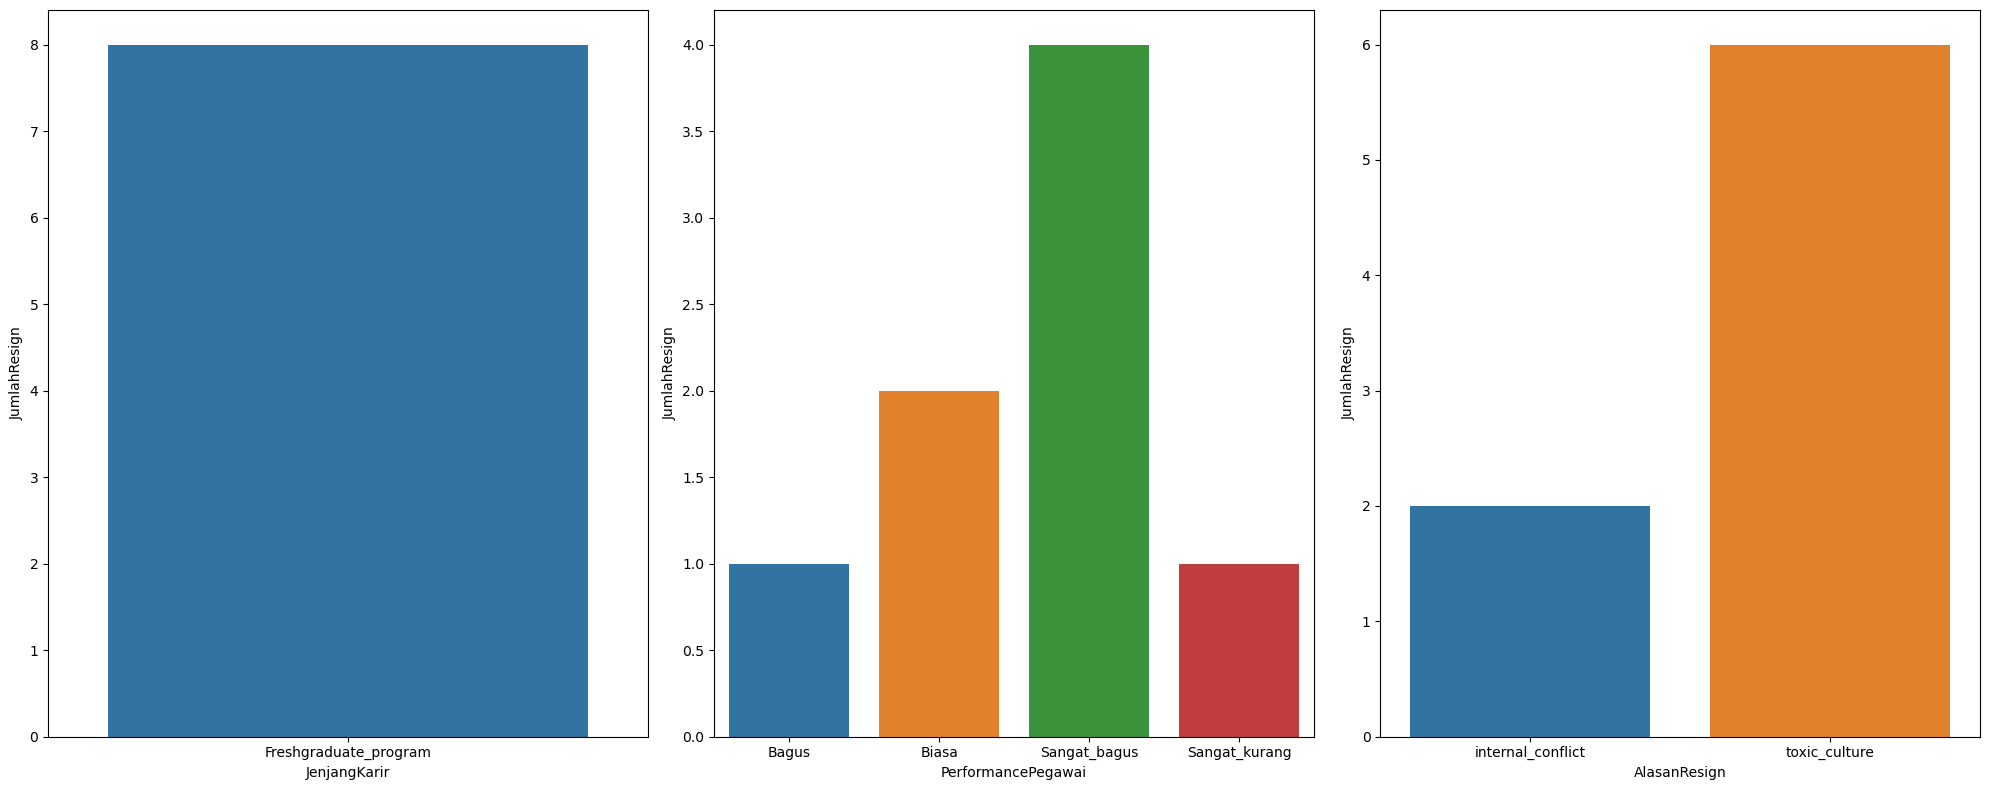

In [67]:
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
sns.barplot (data = jenjang_karir_data_analyst_resign, x = 'JenjangKarir', y ='JumlahResign')
plt.subplot(1,3,2)
sns.barplot (data = performa_pegawai_data_analyst_resign, x = 'PerformancePegawai', y ='JumlahResign')
plt.subplot(1,3,3)
sns.barplot (data = alasan_resign_data_analyst_resign, x = 'AlasanResign', y ='JumlahResign')
plt.tight_layout()

**Hasil analisis:**

Banyak karyawan Data Analyst dengan performa sangat bagus memilih untuk mengundurkan diri dari perusahaan akibat lingkungan kerja yang toxic. 

In [68]:
resigned_data = df_copy1[df_copy1['Resigned']==1]

In [69]:
jenjang_karir_all_resign = resigned_data[['JenjangKarir','EnterpriseID']].groupby('JenjangKarir').agg({'EnterpriseID':'count'}).reset_index().rename(columns={'EnterpriseID':'JumlahResign'})
performa_pegawai_all_resign = resigned_data[['PerformancePegawai','EnterpriseID']].groupby('PerformancePegawai').agg({'EnterpriseID':'count'}).reset_index().rename(columns={'EnterpriseID':'JumlahResign'})
alasan_resign_all_resign = resigned_data[['AlasanResign','EnterpriseID']].groupby('AlasanResign').agg({'EnterpriseID':'count'}).reset_index().rename(columns={'EnterpriseID':'JumlahResign'})

C:\Users\Wika Rabila Putri\AppData\Local\Temp\ipykernel_14020\452309838.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


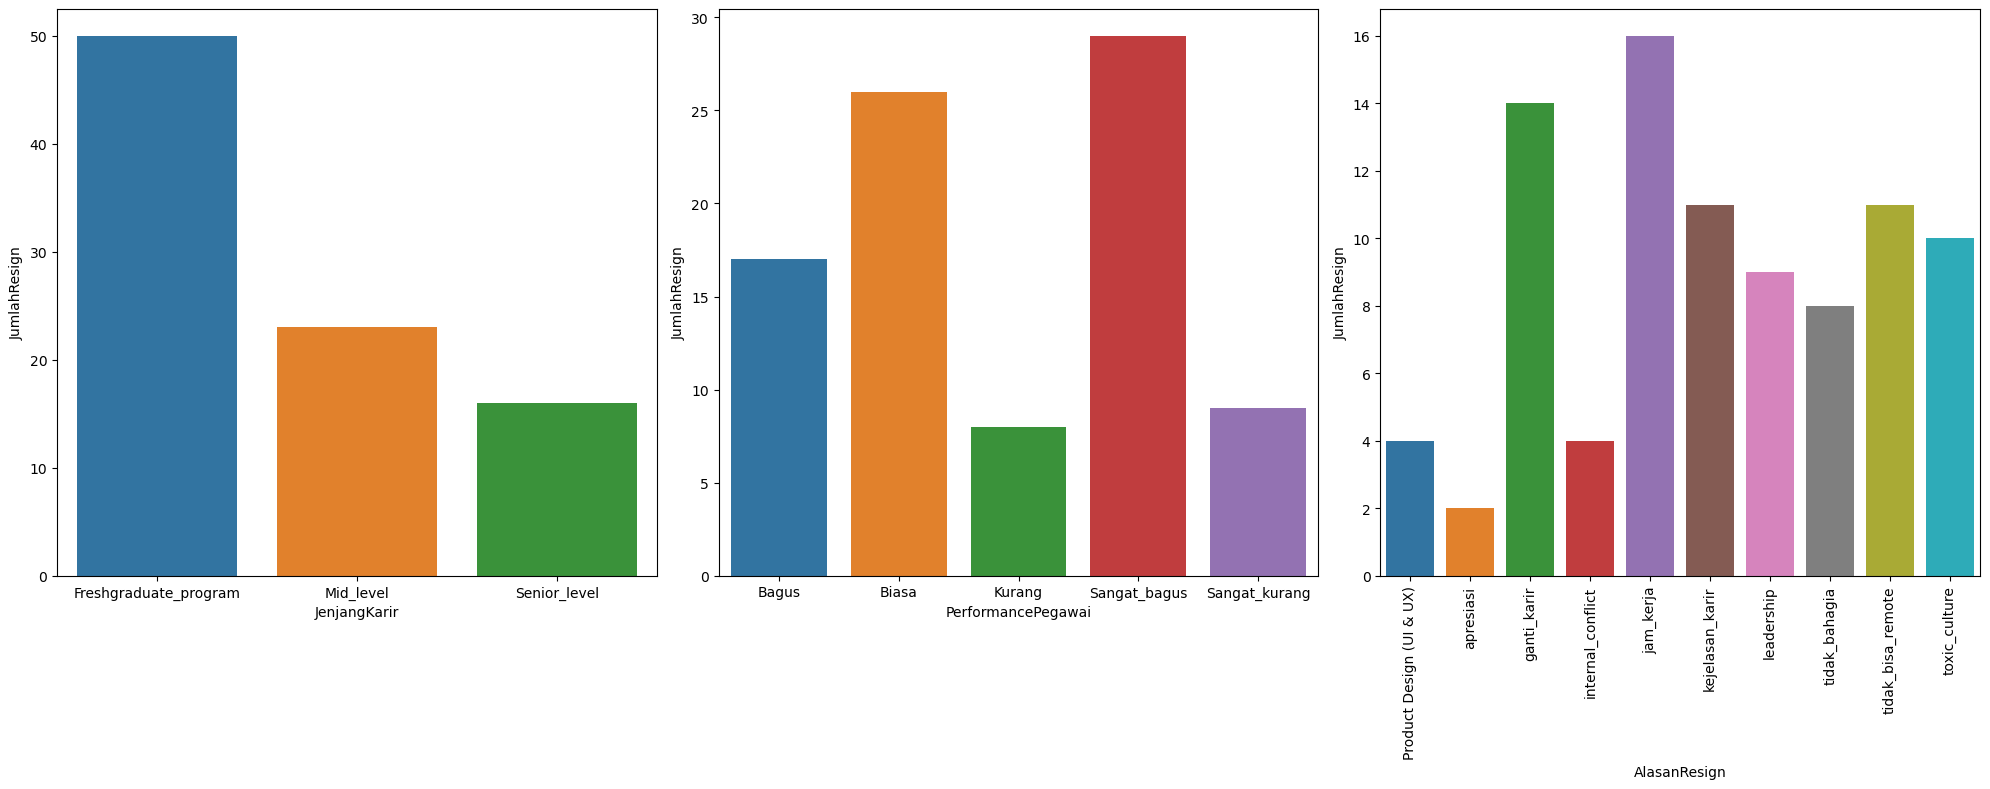

In [70]:
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
sns.barplot (data = jenjang_karir_all_resign, x = 'JenjangKarir', y ='JumlahResign')
plt.subplot(1,3,2)
sns.barplot (data = performa_pegawai_all_resign, x = 'PerformancePegawai', y ='JumlahResign')
plt.tight_layout()
plt.subplot(1,3,3)
sns.barplot (data = alasan_resign_all_resign, x = 'AlasanResign', y ='JumlahResign')
plt.xticks(rotation=90)
plt.tight_layout()

**Hasil analisis:**

1. Banyak karyawan freshgraduate yang memilih resign karena mereka merasa perlu mengubah jalur karir mereka untuk mengejar kesempatan yang lebih sesuai dengan aspirasi dan minat pribadi mereka.

2. Jam kerja yang tidak fleksibel atau terlalu panjang sering kali menjadi alasan utama karyawan memilih untuk resign, mengindikasikan perlunya peninjauan dan perbaikan kebijakan jam kerja untuk meningkatkan kepuasan dan retensi.

# TASK 4: Build an Automated Resignation Behavior Prediction using Machine Learning

In [71]:
df_copy1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Username                            287 non-null    object        
 1   EnterpriseID                        287 non-null    int64         
 2   StatusPernikahan                    287 non-null    object        
 3   JenisKelamin                        287 non-null    object        
 4   StatusKepegawaian                   287 non-null    object        
 5   Pekerjaan                           287 non-null    object        
 6   JenjangKarir                        287 non-null    object        
 7   PerformancePegawai                  287 non-null    object        
 8   AsalDaerah                          287 non-null    object        
 9   HiringPlatform                      287 non-null    object        
 10  SkorSurveyEngagement      

In [72]:
df_copy1

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,TingkatPendidikan,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,Resigned,TahunHiring,TahunResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,...,Magister,1.0,masih_bekerja,1972-07-01,2011-01-10,2016-02-15,NaT,0,2011,NaN
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,...,Sarjana,1.0,toxic_culture,1984-04-26,2014-01-06,2020-01-17,2018-06-16,1,2014,2018.0
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,...,Magister,1.0,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-09-24,1,2011,2014.0
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,...,Sarjana,0.0,masih_bekerja,1979-11-24,2014-02-17,2020-02-04,NaT,0,2014,NaN
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,...,Sarjana,0.0,ganti_karir,1974-11-07,2013-11-11,2020-01-22,2018-09-06,1,2013,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,dopeySheep0,106034,Belum_menikah,Wanita,FullTime,Data Engineer,Mid_level,Bagus,Jakarta Pusat,Google_Search,...,Sarjana,0.0,masih_bekerja,1973-12-08,2011-09-26,2016-03-01,NaT,0,2011,NaN
283,yearningPorpoise4,106254,-,Wanita,FullTime,Product Design (UI & UX),Freshgraduate_program,Biasa,Jakarta Timur,LinkedIn,...,Sarjana,0.0,jam_kerja,1974-12-01,2013-05-13,2020-01-28,2017-11-15,1,2013,2017.0
284,murkySausage9,110433,Menikah,Wanita,FullTime,Software Engineer (Front End),Senior_level,Biasa,Jakarta Pusat,Diversity_Job_Fair,...,Sarjana,1.0,ganti_karir,1969-10-30,2013-11-11,2020-01-21,2018-06-08,1,2013,2018.0
285,truthfulMoth4,110744,Belum_menikah,Pria,FullTime,Software Engineer (Android),Mid_level,Bagus,Jakarta Utara,Google_Search,...,Sarjana,0.0,kejelasan_karir,1981-10-01,2011-05-16,2014-04-05,2018-04-01,1,2011,2018.0


In [73]:
num = []
cat = []
date = []

for i in df_copy1:
  if df_copy1[i].dtypes in ['int64','float64'] :
    num.append(i)
  if df_copy1[i].dtypes == 'datetime64[ns]' :
    date.append(i)
  else :
    cat.append(i)

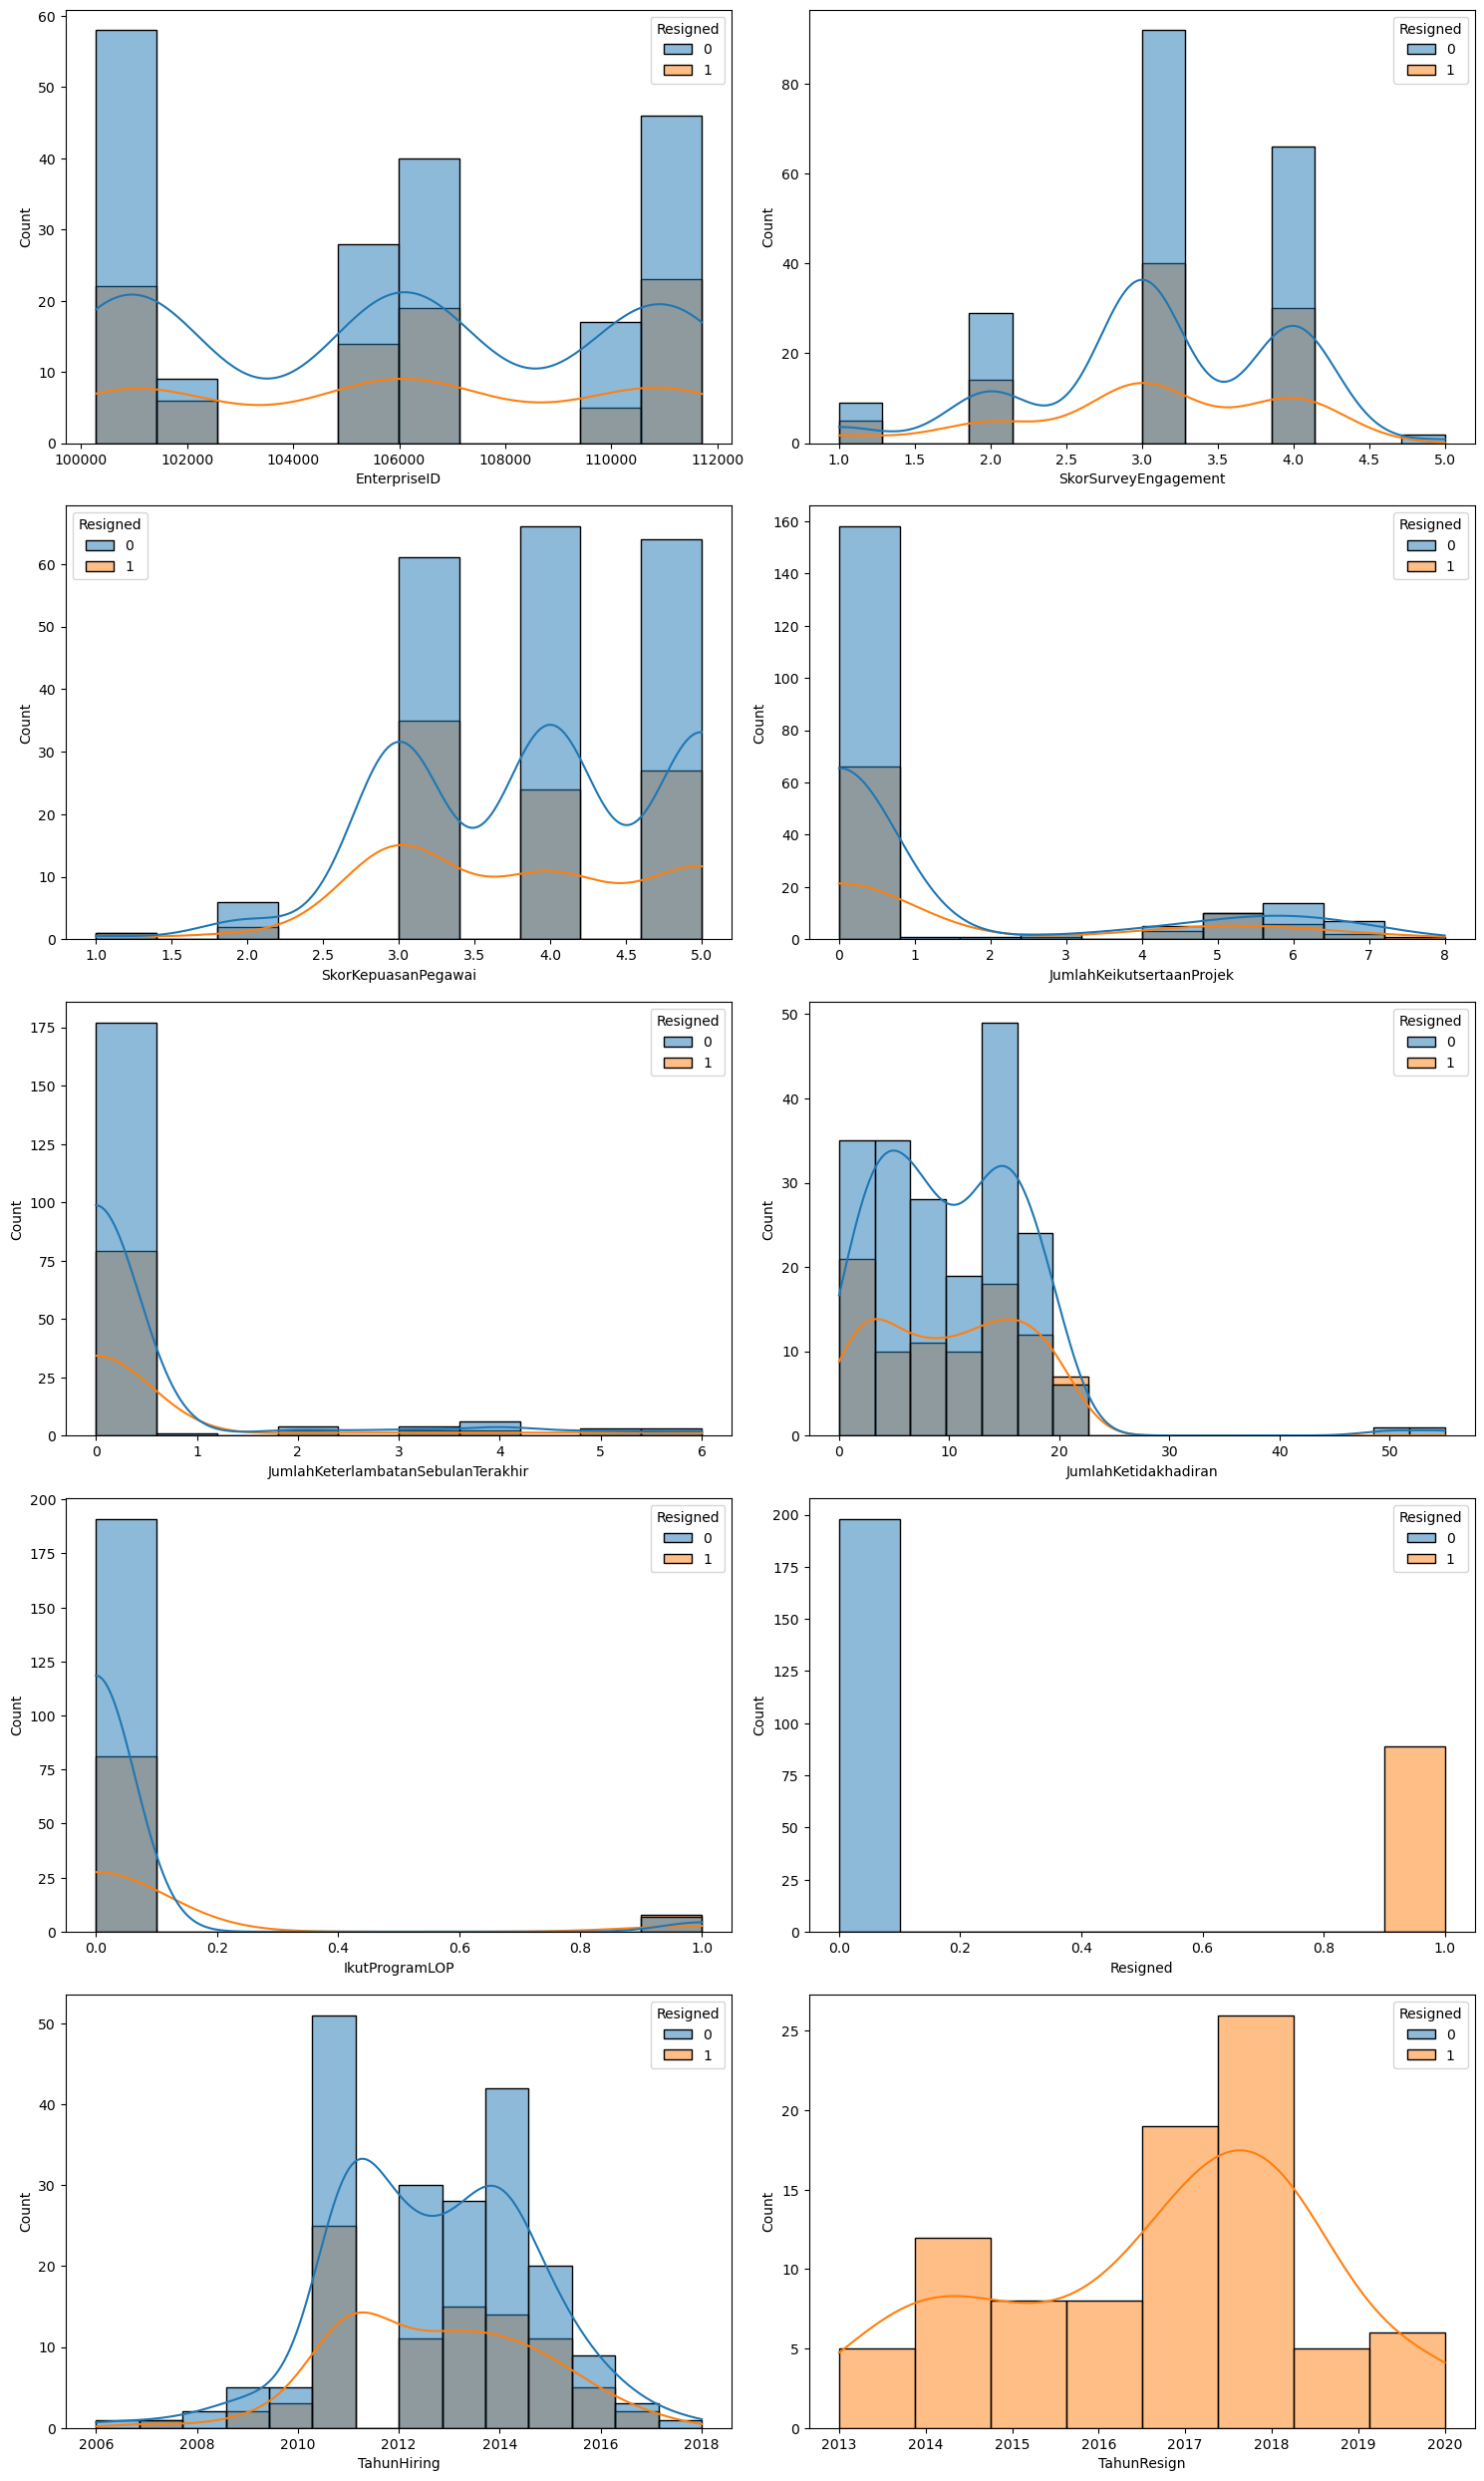

In [74]:
plt.figure(figsize=(15, 25))
for i in range(len(num)):
    plt.subplot(5, 2, i + 1)
    sns.histplot(data=df_copy1, x=num[i], kde=True, hue='Resigned')

plt.tight_layout()
plt.show()

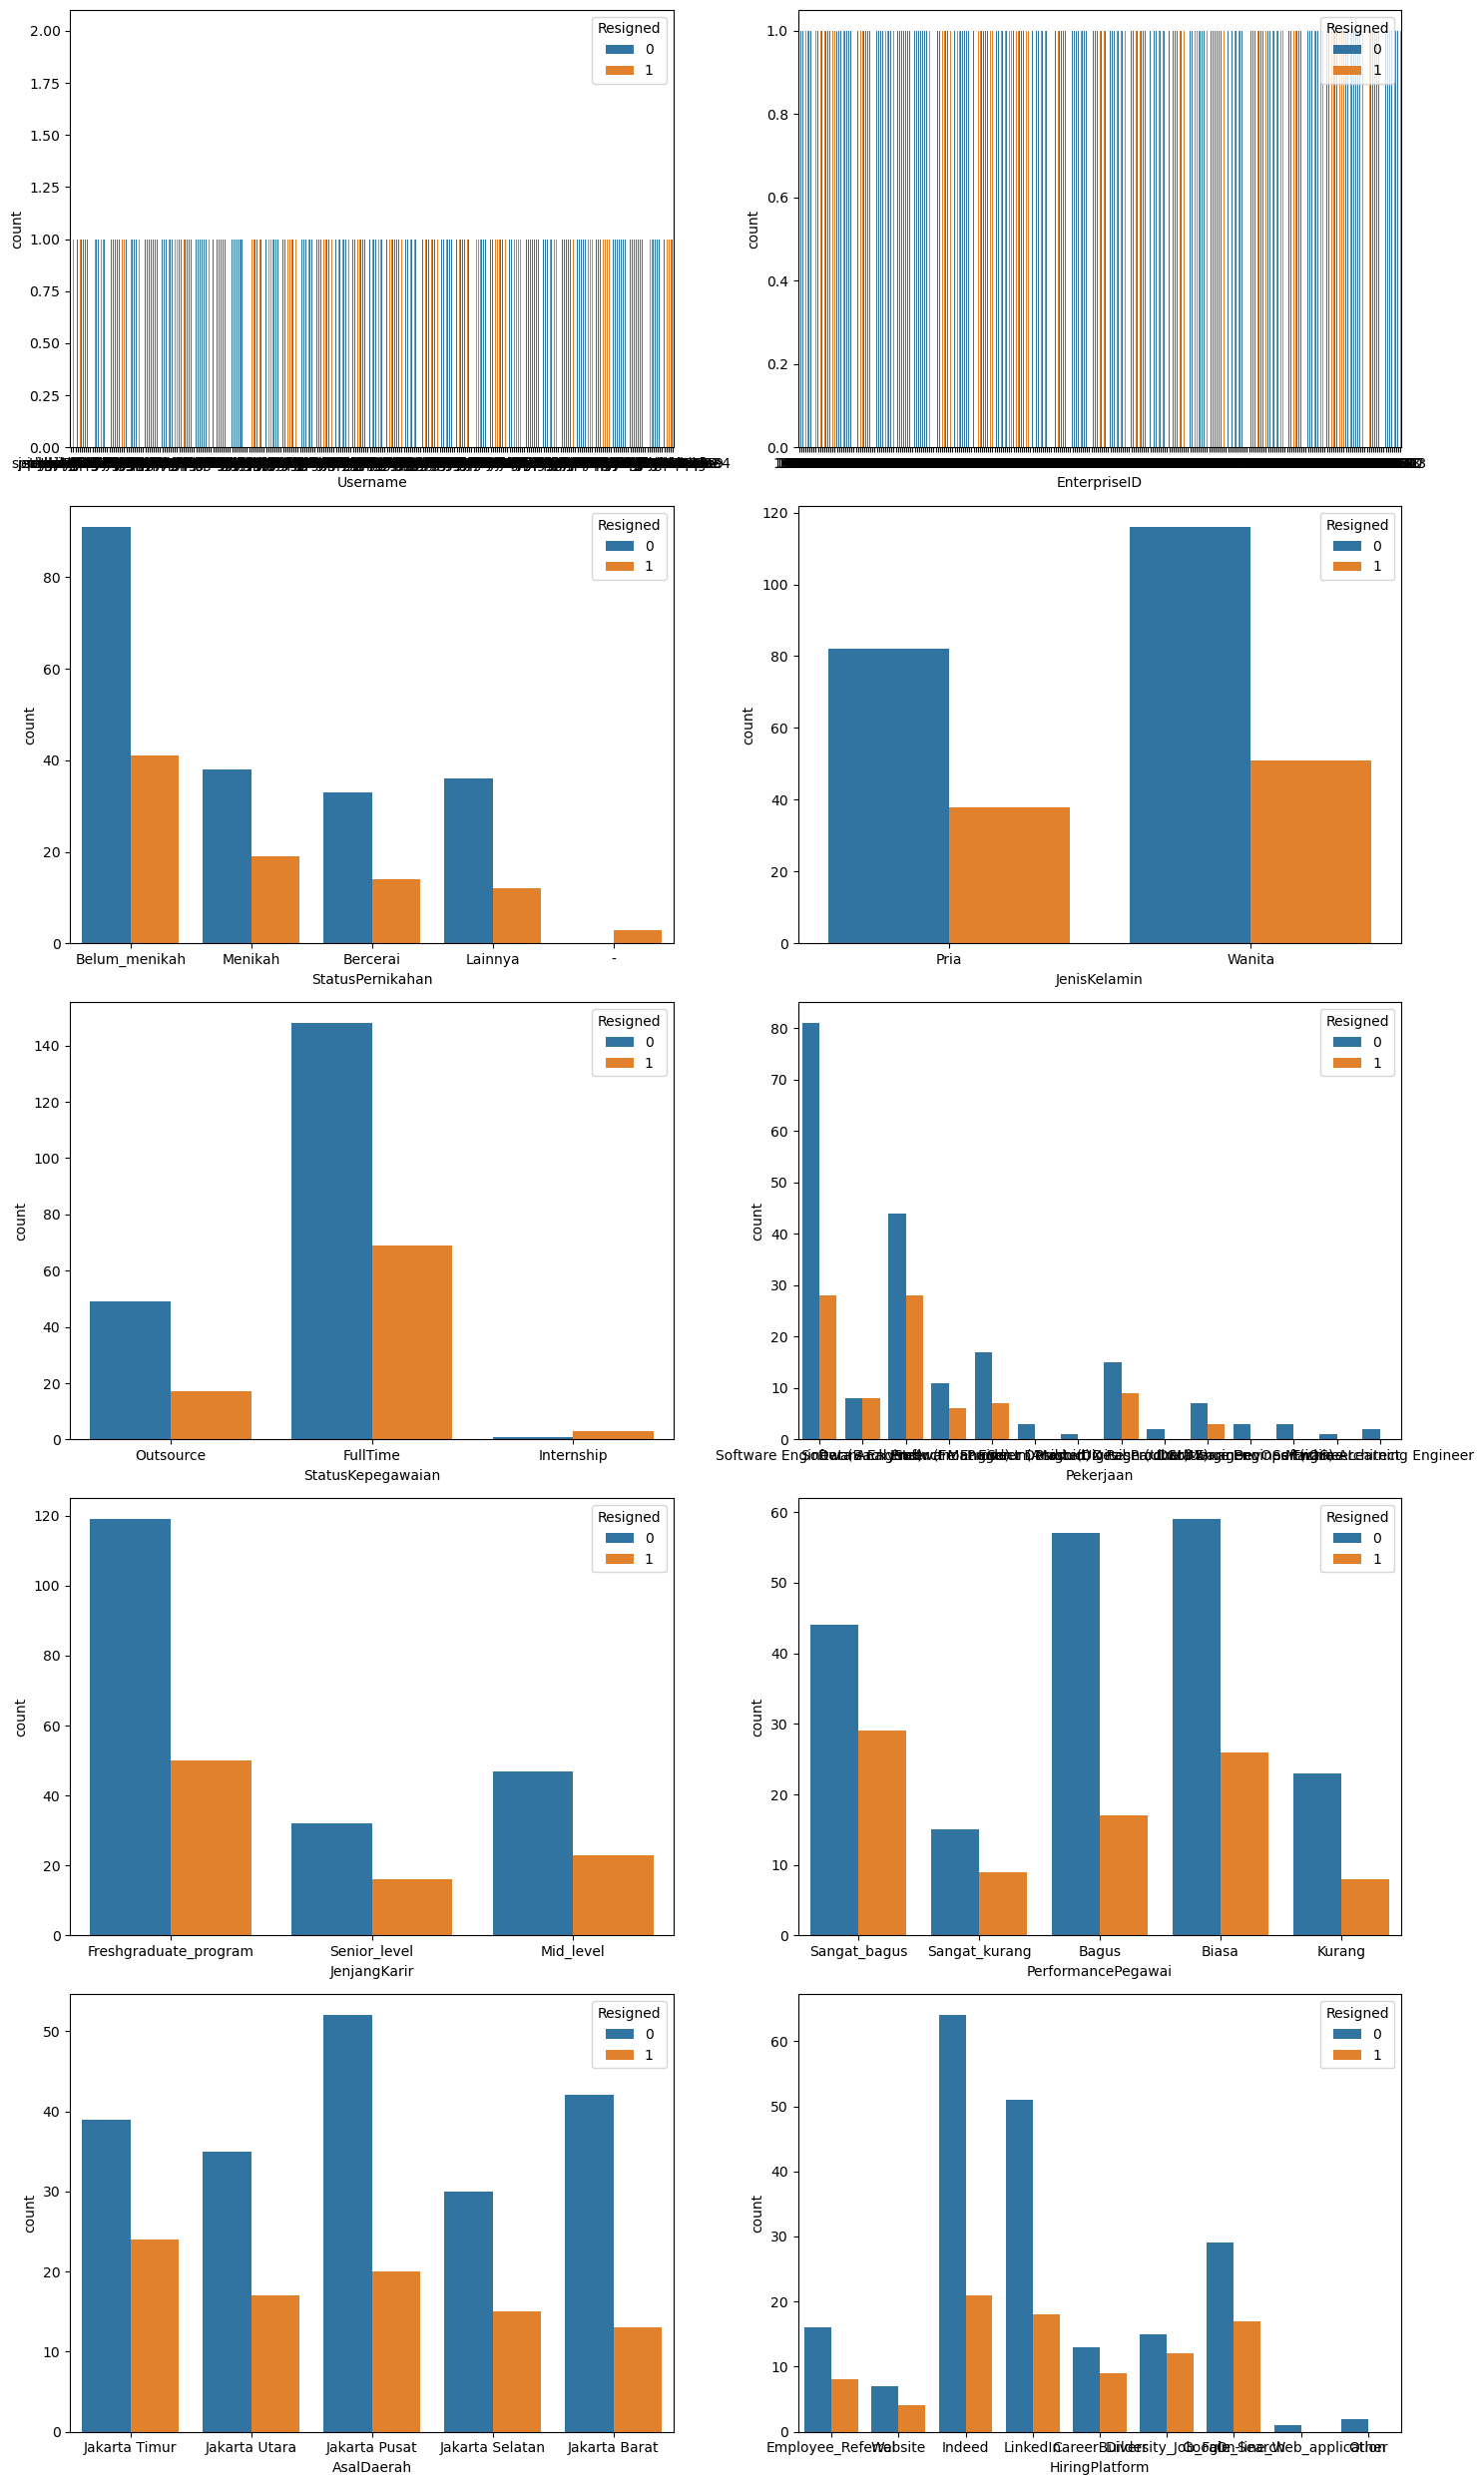

In [75]:
plt.figure(figsize=(15,25))
for i in range(len(num)) :
  plt.subplot(5,2,i+1)
  sns.countplot(data=df, x=cat[i],hue ='Resigned')

plt.tight_layout()
plt.show()

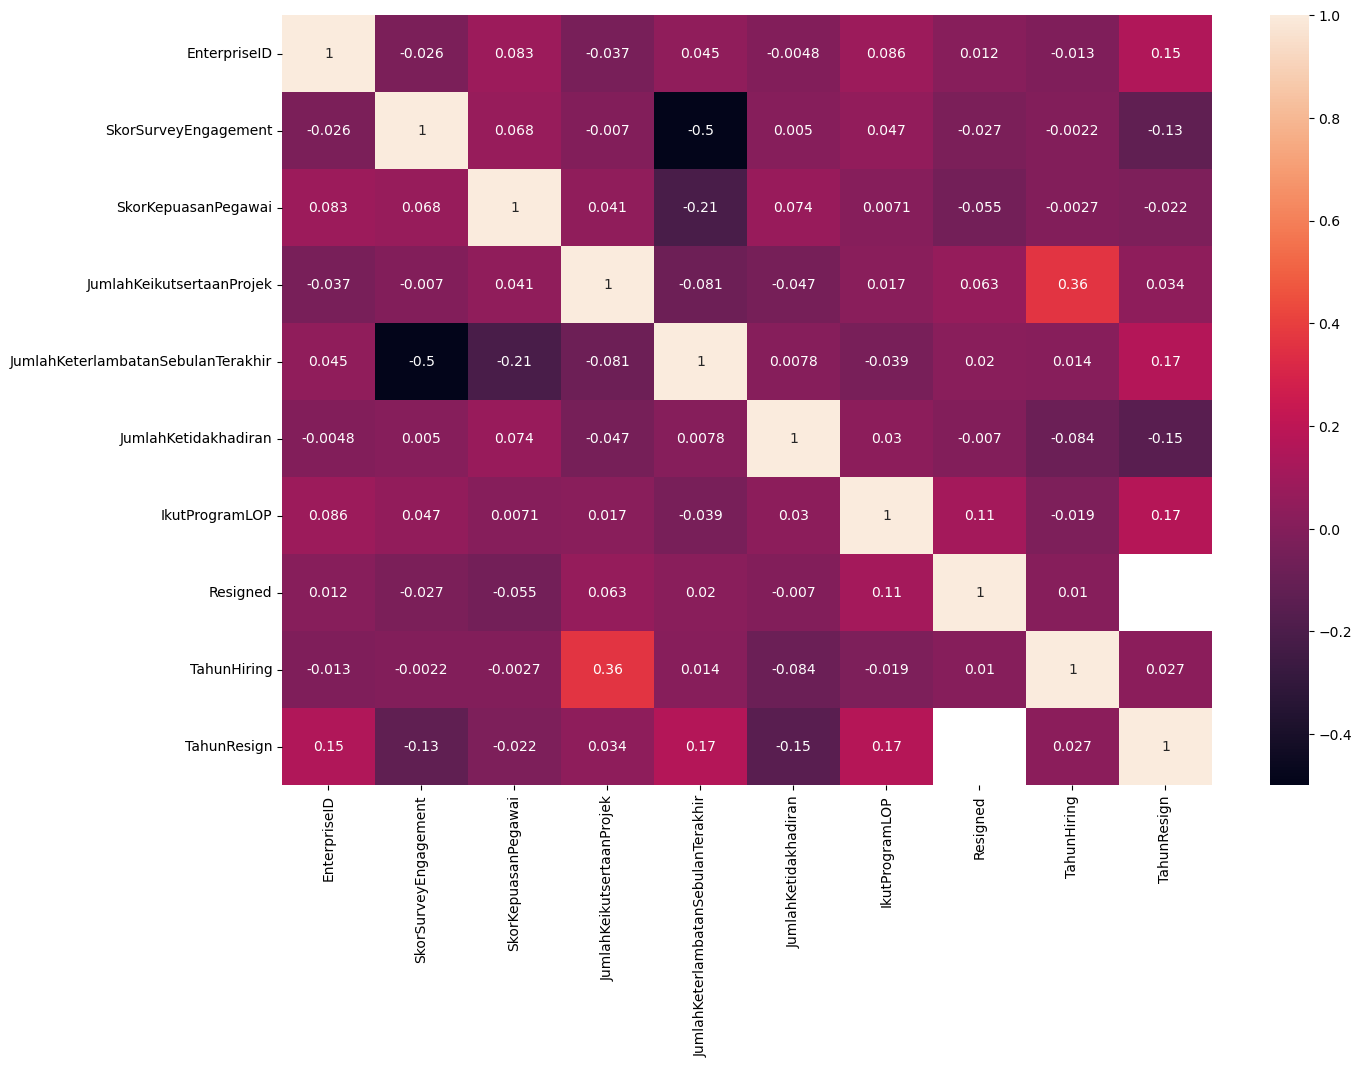

In [76]:
#memilih fitur numerik
numerical_df = df_copy1.select_dtypes(include=['float64', 'int64'])

#visualisasi (heatmap)
plt.figure(figsize=(15, 10))
sns.heatmap(data=numerical_df.corr(), annot=True)
plt.show()

In [77]:
#feature selection 1
features = ['SkorSurveyEngagement', 'SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran', 'JenjangKarir', 'IkutProgramLOP', 'PerformancePegawai','Resigned']
df_feature = df_copy1[features]
df_feature

,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,JenjangKarir,IkutProgramLOP,PerformancePegawai,Resigned
0,4,4.0,0.0,0.0,9.0,Freshgraduate_program,1.0,Sangat_bagus,0
1,4,4.0,4.0,0.0,3.0,Freshgraduate_program,1.0,Sangat_kurang,1
2,4,3.0,0.0,0.0,11.0,Freshgraduate_program,1.0,Bagus,1
3,3,3.0,0.0,4.0,6.0,Freshgraduate_program,0.0,Bagus,0
4,3,3.0,0.0,0.0,11.0,Freshgraduate_program,0.0,Bagus,1
...,...,...,...,...,...,...,...,...,...
282,2,5.0,0.0,0.0,16.0,Mid_level,0.0,Bagus,0
283,4,5.0,0.0,0.0,11.0,Freshgraduate_program,0.0,Biasa,1
284,2,5.0,0.0,0.0,17.0,Senior_level,1.0,Biasa,1
285,4,5.0,0.0,0.0,20.0,Mid_level,0.0,Bagus,1


In [78]:
df_copy1['JenjangKarir'].value_counts()

JenjangKarir
Freshgraduate_program    169
Mid_level                 70
Senior_level              48
Name: count, dtype: int64

In [79]:
df_copy1['PerformancePegawai'].value_counts()

PerformancePegawai
Biasa            85
Bagus            74
Sangat_bagus     73
Kurang           31
Sangat_kurang    24
Name: count, dtype: int64

In [80]:
#menggunakan .loc untuk menghindari SettingWithCopyWarning
df_feature.loc[:, 'JenjangKarirEncoded'] = np.where(df_feature['JenjangKarir'] == 'Freshgraduate_program', 1,
                                                    np.where(df_feature['JenjangKarir'] == 'Mid_level', 2, 3))

df_feature.loc[:, 'PerformancePegawaiEncoded'] = np.where(df_feature['PerformancePegawai'] == 'Sangat_kurang', 1, 
                                                          np.where(df_feature['PerformancePegawai'] == 'Kurang', 2,
                                                                   np.where(df_feature['PerformancePegawai'] == 'Biasa', 3,
                                                                            np.where(df_feature['PerformancePegawai'] == 'Bagus', 4, 5))))

C:\Users\Wika Rabila Putri\AppData\Local\Temp\ipykernel_14020\284571521.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_feature.loc[:, 'JenjangKarirEncoded'] = np.where(df_feature['JenjangKarir'] == 'Freshgraduate_program', 1,
C:\Users\Wika Rabila Putri\AppData\Local\Temp\ipykernel_14020\284571521.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_feature.loc[:, 'PerformancePegawaiEncoded'] = np.where(df_feature['PerformancePegawai'] == 'Sangat_kurang', 1,


In [81]:
df_feature.describe()

,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,IkutProgramLOP,Resigned,JenjangKarirEncoded,PerformancePegawaiEncoded
count,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,3.101045,3.905923,1.167247,0.411150,10.229965,0.052265,0.310105,1.578397,3.491289
std,0.836388,0.905423,2.285537,1.273018,6.991709,0.222949,0.463344,0.761821,1.217196
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,3.000000,3.000000,0.000000,0.000000,4.000000,0.000000,0.000000,1.000000,3.000000
50%,3.000000,4.000000,0.000000,0.000000,10.000000,0.000000,0.000000,1.000000,4.000000
75%,4.000000,5.000000,0.000000,0.000000,15.000000,0.000000,1.000000,2.000000,5.000000
max,5.000000,5.000000,8.000000,6.000000,55.000000,1.000000,1.000000,3.000000,5.000000


In [82]:
df_feature = df_feature.drop(columns =['JenjangKarir', 'PerformancePegawai'])

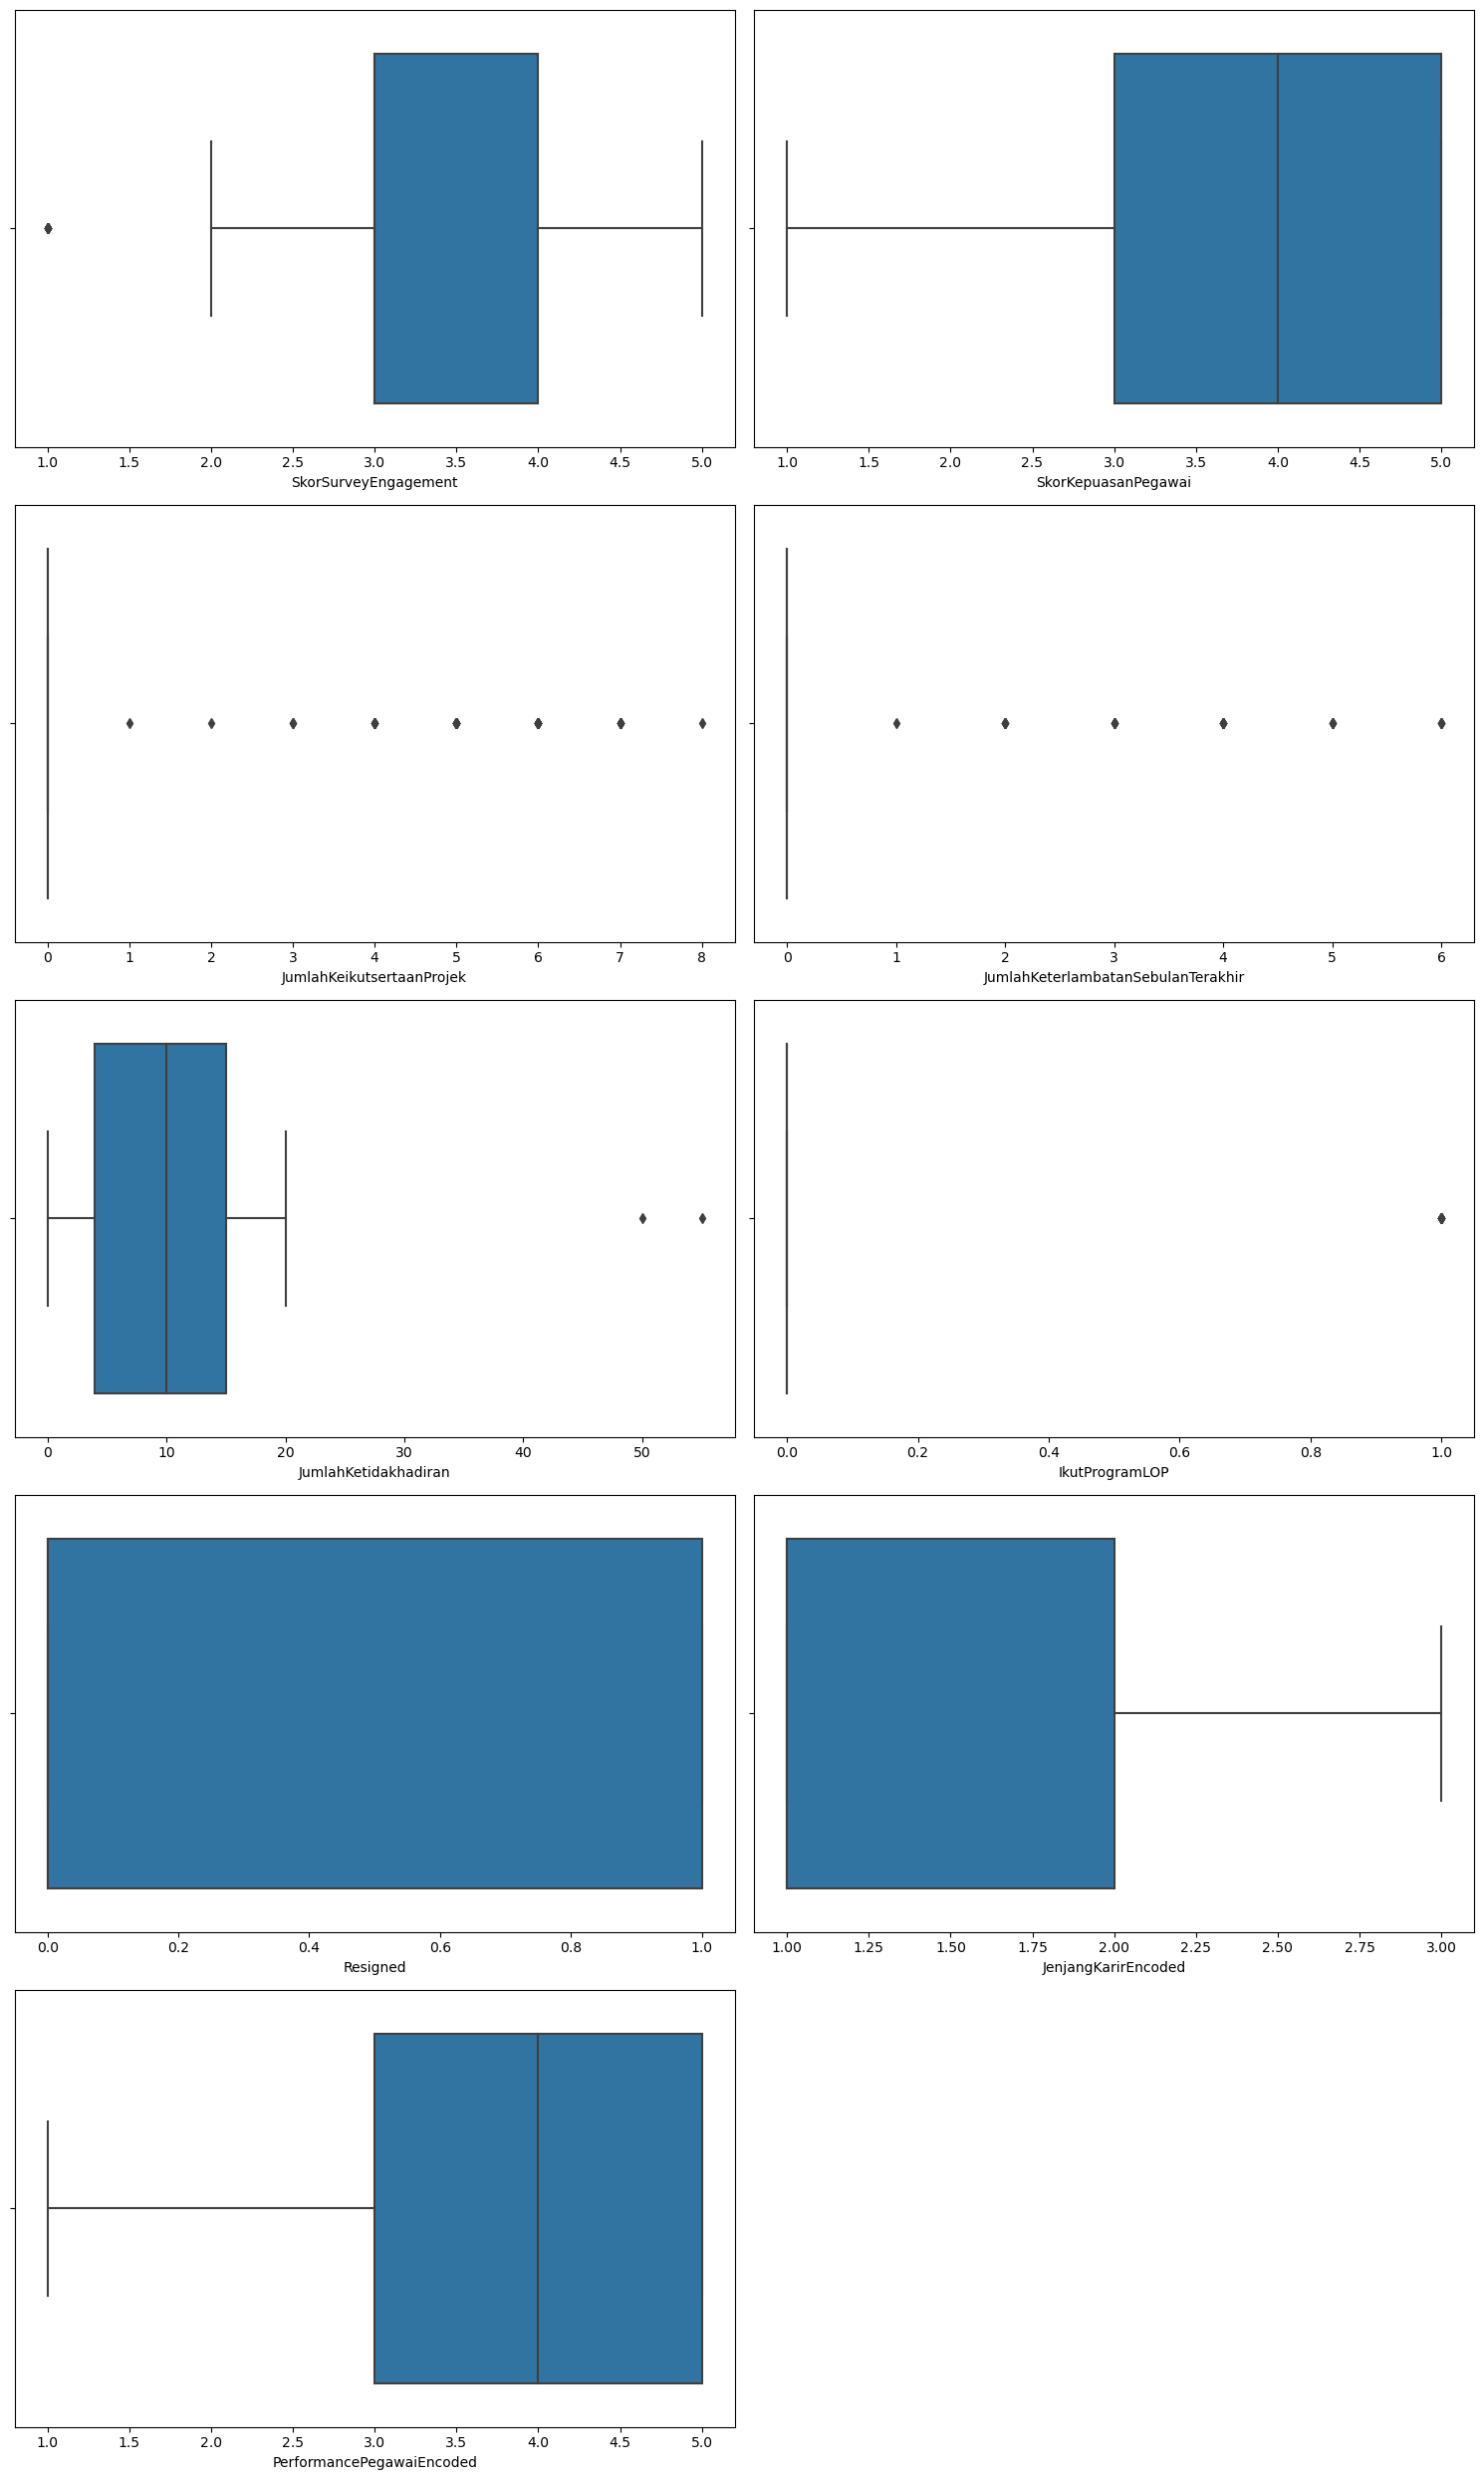

In [83]:
plt.figure(figsize=(15,25))
n = 0
for i in df_feature :
  n += 1
  plt.subplot(5,2,n)
  sns.boxplot(data=df_feature, x=i)

plt.tight_layout()
plt.show()

In [84]:
df_feature[df_feature['JumlahKetidakhadiran']>20]

,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,IkutProgramLOP,Resigned,JenjangKarirEncoded,PerformancePegawaiEncoded
12,4,3.0,0.0,0.0,50.0,0.0,0,1,3
115,4,5.0,0.0,0.0,55.0,0.0,0,2,3


In [85]:
df_feature = df_feature[df_feature['JumlahKetidakhadiran']<=20]

In [86]:
y = df_feature['Resigned']
X = df_feature.drop(columns=['Resigned'])

In [87]:
X.describe()

,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,IkutProgramLOP,JenjangKarirEncoded,PerformancePegawaiEncoded
count,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000
mean,3.094737,3.905263,1.175439,0.414035,9.933333,0.052632,1.578947,3.494737
std,0.835907,0.904687,2.291463,1.277023,6.042611,0.223690,0.763318,1.220774
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,3.000000,3.000000,0.000000,0.000000,4.000000,0.000000,1.000000,3.000000
50%,3.000000,4.000000,0.000000,0.000000,10.000000,0.000000,1.000000,4.000000
75%,4.000000,5.000000,0.000000,0.000000,15.000000,0.000000,2.000000,5.000000
max,5.000000,5.000000,8.000000,6.000000,20.000000,1.000000,3.000000,5.000000


In [88]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
def normalization (df_copy1):
  for i in df_copy1 :
    df_copy1[i] = MinMaxScaler().fit_transform(df_copy1[i].values.reshape(len(df_copy1),1))
  return df_copy1

X_norm = normalization (X)
X_norm

,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,IkutProgramLOP,JenjangKarirEncoded,PerformancePegawaiEncoded
0,0.75,0.75,0.0,0.000000,0.45,1.0,0.0,1.00
1,0.75,0.75,0.5,0.000000,0.15,1.0,0.0,0.00
2,0.75,0.50,0.0,0.000000,0.55,1.0,0.0,0.75
3,0.50,0.50,0.0,0.666667,0.30,0.0,0.0,0.75
4,0.50,0.50,0.0,0.000000,0.55,0.0,0.0,0.75
...,...,...,...,...,...,...,...,...
282,0.25,1.00,0.0,0.000000,0.80,0.0,0.5,0.75
283,0.75,1.00,0.0,0.000000,0.55,0.0,0.0,0.50
284,0.25,1.00,0.0,0.000000,0.85,1.0,1.0,0.50
285,0.75,1.00,0.0,0.000000,1.00,0.0,0.5,0.75


In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_norm,y, test_size=0.3, random_state=42)

In [90]:
y_train.value_counts()

Resigned
0    132
1     67
Name: count, dtype: int64

In [91]:
from imblearn.over_sampling import SMOTE
from sklearn import metrics

# Setup SMOTE with random_state for consistency
smote = SMOTE(random_state=42)


# Apply SMOTE
smote = SMOTE()
X_train_SMOTE, y_train_SMOTE = smote.fit_resample(X_train, y_train)

In [92]:
y_train_SMOTE.value_counts()

Resigned
1    132
0    132
Name: count, dtype: int64

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn import metrics

In [94]:
#menggunakan data train (data asli)

models = {
    "LogisticRegression": LogisticRegression(random_state=42),
    "LogisticRegressionCV": LogisticRegressionCV(random_state=42),
    "DecisionTree" : DecisionTreeClassifier(random_state=42),
    "RandomForest" : RandomForestClassifier(random_state=42),
    "KNeighbors" : KNeighborsClassifier(),
    "AdaBoost" : AdaBoostClassifier(),
    "XGB" : XGBClassifier()
}

for model, clf in models.items() :
  print(model)
  print(clf)
  clf.fit(X_train,y_train.values.ravel())
  y_pred_train = clf.predict(X_train)
  y_pred_proba_train = clf.predict_proba(X_train)[:,1]
  y_pred_test = clf.predict(X_test)
  y_pred_proba_test = clf.predict_proba(X_test)[:,1]
    
  print("Evaluate model: {}".format(model))
  
  accuracy_train = metrics.accuracy_score(y_train,y_pred_train)
  print("Accuracy Train :" + str(round(accuracy_train*100,2)) + '%')
  accuracy_test = metrics.accuracy_score(y_test,y_pred_test)
  print("Accuracy Test :" + str(round(accuracy_test*100,2)) + '%')

  precission_train = metrics.precision_score(y_train,y_pred_train,pos_label=1)
  print("Precission Train :" + str(round(precission_train*100,2)) + '%')
  precission_test = metrics.precision_score(y_test,y_pred_test,pos_label=1)
  print("Precission Test :" + str(round(precission_test*100,2)) + '%')

  recall_train = metrics.recall_score(y_train,y_pred_train,pos_label=1)
  print("Recall Train :" + str(round(recall_train*100,2)) + '%')
  recall_test = metrics.recall_score(y_test,y_pred_test,pos_label=1)
  print("Recall Test :" + str(round(recall_test*100,2)) + '%')

  f1_train = metrics.f1_score(y_train,y_pred_train,pos_label=1)
  print("F1 Train :" + str(round(f1_train*100,2)) + '%')
  f1_test = metrics.f1_score(y_test,y_pred_test,pos_label=1)
  print("F1 Test :" + str(round(f1_test*100,2)) + '%')

  fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train, y_pred_proba_train, pos_label=1)
  auc_train = metrics.auc(fpr_train, tpr_train)
  print("AUC Test :"+str(round(auc_train*100,2))+'%')
  fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_test, y_pred_proba_test, pos_label=1)
  auc_test = metrics.auc(fpr_test, tpr_test)
  print("AUC Test :"+str(round(auc_test*100,2))+'%')
  print("\n")

LogisticRegression
LogisticRegression(random_state=42)
Evaluate model: LogisticRegression
Accuracy Train :67.84%
Accuracy Test :72.09%
Precission Train :63.64%
Precission Test :25.0%
Recall Train :10.45%
Recall Test :4.55%
F1 Train :17.95%
F1 Test :7.69%
AUC Test :61.95%
AUC Test :49.15%


LogisticRegressionCV
LogisticRegressionCV(random_state=42)
Evaluate model: LogisticRegressionCV
Accuracy Train :66.33%
Accuracy Test :74.42%
Precission Train :0.0%
Precission Test :0.0%
Recall Train :0.0%
Recall Test :0.0%
F1 Train :0.0%
F1 Test :0.0%
AUC Test :61.69%
AUC Test :49.64%


DecisionTree
DecisionTreeClassifier(random_state=42)
Evaluate model: DecisionTree
Accuracy Train :98.49%
Accuracy Test :59.3%
Precission Train :100.0%
Precission Test :30.3%
Recall Train :95.52%
Recall Test :45.45%
F1 Train :97.71%
F1 Test :36.36%
AUC Test :99.95%
AUC Test :53.91%


RandomForest
RandomForestClassifier(random_state=42)
Evaluate model: RandomForest
Accuracy Train :98.49%
Accuracy Test :62.79%
Precission

D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Evaluate model: KNeighbors
Accuracy Train :73.87%
Accuracy Test :61.63%
Precission Train :63.16%
Precission Test :23.81%
Recall Train :53.73%
Recall Test :22.73%
F1 Train :58.06%
F1 Test :23.26%
AUC Test :81.61%
AUC Test :50.11%


AdaBoost
AdaBoostClassifier()
Evaluate model: AdaBoost
Accuracy Train :70.85%
Accuracy Test :62.79%
Precission Train :62.16%
Precission Test :14.29%
Recall Train :34.33%
Recall Test :9.09%
F1 Train :44.23%
F1 Test :11.11%
AUC Test :74.49%
AUC Test :36.47%


XGB
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta

**Precision Test (False Positive kecil):**

1. LogisticRegression 25.0%
2. LogisticRegresionCV 0.0% (tidak ada prediksi positif, precision tidak terdefinisi)
3. DecissionTree 30.3%
4. RandomForest 29.17%
5. KNeighbors 23.81%
6. Adaboost 14.29%
7. XGboost 24.0%

In [95]:
#menggunakan data train yang telah di-SMOTE

from imblearn.over_sampling import SMOTE
from sklearn import metrics

#setup SMOTE with random_state for consistency
smote = SMOTE(random_state=42)

#apply SMOTE only to training data
X_train_SMOTE, y_train_SMOTE = smote.fit_resample(X_train, y_train)

models = {
    "LogisticRegression": LogisticRegression(random_state=42),
    "LogisticRegressionCV": LogisticRegressionCV(random_state=42),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(random_state=42),
    "KNeighbors": KNeighborsClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGB": XGBClassifier(random_state=42)  # Adding random_state for consistency
}

for model, clf in models.items():
    print(model)
    print(clf)
    
    # Fit the model
    clf.fit(X_train_SMOTE, y_train_SMOTE.values.ravel())
    
    # Make predictions
    y_pred_train = clf.predict(X_train_SMOTE)
    y_pred_proba_train = clf.predict_proba(X_train_SMOTE)[:,1]
    y_pred_test = clf.predict(X_test)
    y_pred_proba_test = clf.predict_proba(X_test)[:,1]
    
    print("Evaluate model: {}".format(model))
    
    # Calculate metrics
    accuracy_train = metrics.accuracy_score(y_train_SMOTE, y_pred_train)
    print("Accuracy Train :" + str(round(accuracy_train * 100, 2)) + '%')
    accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
    print("Accuracy Test :" + str(round(accuracy_test * 100, 2)) + '%')

    precision_train = metrics.precision_score(y_train_SMOTE, y_pred_train, pos_label=1)
    print("Precision Train :" + str(round(precision_train * 100, 2)) + '%')
    precision_test = metrics.precision_score(y_test, y_pred_test, pos_label=1)
    print("Precision Test :" + str(round(precision_test * 100, 2)) + '%')

    recall_train = metrics.recall_score(y_train_SMOTE, y_pred_train, pos_label=1)
    print("Recall Train :" + str(round(recall_train * 100, 2)) + '%')
    recall_test = metrics.recall_score(y_test, y_pred_test, pos_label=1)
    print("Recall Test :" + str(round(recall_test * 100, 2)) + '%')

    f1_train = metrics.f1_score(y_train_SMOTE, y_pred_train, pos_label=1)
    print("F1 Train :" + str(round(f1_train * 100, 2)) + '%')
    f1_test = metrics.f1_score(y_test, y_pred_test, pos_label=1)
    print("F1 Test :" + str(round(f1_test * 100, 2)) + '%')

    fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train_SMOTE, y_pred_proba_train, pos_label=1)
    auc_train = metrics.auc(fpr_train, tpr_train)
    print("AUC Train :" + str(round(auc_train * 100, 2)) + '%')
    fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_test, y_pred_proba_test, pos_label=1)
    auc_test = metrics.auc(fpr_test, tpr_test)
    print("AUC Test :" + str(round(auc_test * 100, 2)) + '%')
    print("\n")

LogisticRegression
LogisticRegression(random_state=42)
Evaluate model: LogisticRegression
Accuracy Train :56.82%
Accuracy Test :53.49%
Precision Train :58.82%
Precision Test :21.88%
Recall Train :45.45%
Recall Test :31.82%
F1 Train :51.28%
F1 Test :25.93%
AUC Train :62.62%
AUC Test :49.22%


LogisticRegressionCV
LogisticRegressionCV(random_state=42)
Evaluate model: LogisticRegressionCV
Accuracy Train :60.98%
Accuracy Test :54.65%
Precision Train :63.06%
Precision Test :27.03%
Recall Train :53.03%
Recall Test :45.45%
F1 Train :57.61%
F1 Test :33.9%
AUC Train :62.34%
AUC Test :48.72%


DecisionTree
DecisionTreeClassifier(random_state=42)
Evaluate model: DecisionTree
Accuracy Train :98.86%
Accuracy Test :58.14%
Precision Train :100.0%
Precision Test :28.12%
Recall Train :97.73%
Recall Test :40.91%
F1 Train :98.85%
F1 Test :33.33%
AUC Train :99.97%
AUC Test :51.1%


RandomForest
RandomForestClassifier(random_state=42)
Evaluate model: RandomForest
Accuracy Train :98.86%
Accuracy Test :59.3%

D:\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


**Precision Test (False Positive kecil):**

1. LogisticRegression 21.88%
2. LogisticRegresionCV 27.03%
3. DecissionTree 28.12%
4. RandomForest 25.93%
5. KNeighbors 29.27%
6. Adaboost 15.38%
7. XGboost 31.03%

In [96]:
#inisialisasi model XGBClassifier
clf = XGBClassifier(random_state=42)

#melatih model
clf.fit(X_train_SMOTE, y_train_SMOTE.values.ravel())

#prediksi pada data train dan test
y_pred_train = clf.predict(X_train_SMOTE)
y_pred_proba_train = clf.predict_proba(X_train_SMOTE)[:, 1]
y_pred_test = clf.predict(X_test)
y_pred_proba_test = clf.predict_proba(X_test)[:, 1]

#evaluasi model
print("Evaluate model: {}".format(clf))

accuracy_train = metrics.accuracy_score(y_train_SMOTE, y_pred_train)
print("Accuracy Train :" + str(round(accuracy_train * 100, 2)) + '%')
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
print("Accuracy Test :" + str(round(accuracy_test * 100, 2)) + '%')

precision_train = metrics.precision_score(y_train_SMOTE, y_pred_train, pos_label=1)
print("Precision Train :" + str(round(precision_train * 100, 2)) + '%')
precision_test = metrics.precision_score(y_test, y_pred_test, pos_label=1)
print("Precision Test :" + str(round(precision_test * 100, 2)) + '%')

recall_train = metrics.recall_score(y_train_SMOTE, y_pred_train, pos_label=1)
print("Recall Train :" + str(round(recall_train * 100, 2)) + '%')
recall_test = metrics.recall_score(y_test, y_pred_test, pos_label=1)
print("Recall Test :" + str(round(recall_test * 100, 2)) + '%')

f1_train = metrics.f1_score(y_train_SMOTE, y_pred_train, pos_label=1)
print("F1 Train :" + str(round(f1_train * 100, 2)) + '%')
f1_test = metrics.f1_score(y_test, y_pred_test, pos_label=1)
print("F1 Test :" + str(round(f1_test * 100, 2)) + '%')

fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train_SMOTE, y_pred_proba_train, pos_label=1)
auc_train = metrics.auc(fpr_train, tpr_train)
print("AUC Train :" + str(round(auc_train * 100, 2)) + '%')
fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_test, y_pred_proba_test, pos_label=1)
auc_test = metrics.auc(fpr_test, tpr_test)
print("AUC Test :" + str(round(auc_test * 100, 2)) + '%')

Evaluate model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
Accuracy Train :98.48%
Accuracy Test :61.63%
Precision Train :99.23%
Precision Test :31.03%
Recall Train :97.73%
Recall Test :40.91%
F1 Train :98.47%
F1 Test :35.29%
AUC Train :99.95%
AUC Test :52.27%


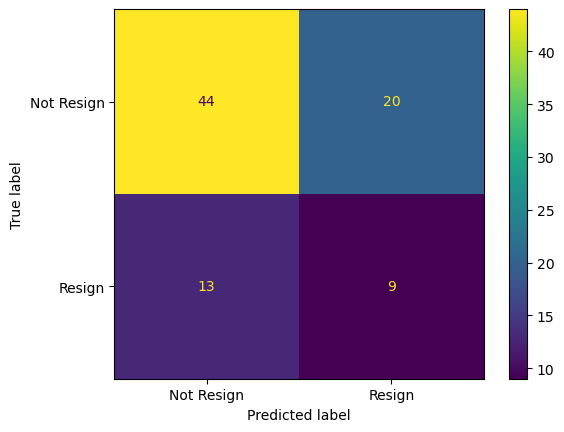

In [97]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Not Resign','Resign'])

cm_display.plot()
plt.show()

Text(0.5, 1.0, 'feature importance score')

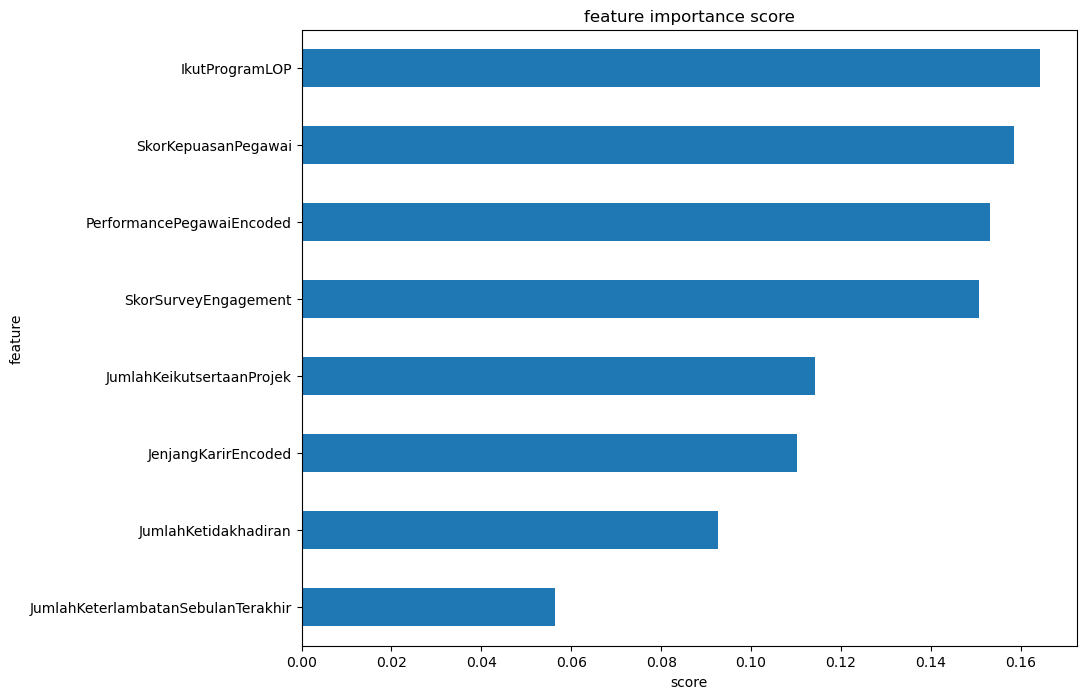

In [98]:
feat_imp = pd.Series(clf.feature_importances_, index=X.columns)
ax = feat_imp.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

In [99]:
performance_log = pd.DataFrame(columns=["Experiment", "Accuracy", "Precision", "Recall", "AUC"])

#menambahkan hasil evaluasi XGBoost ke dalam DataFrame
perf = {
    "Experiment": "XGBoost",
    "Accuracy": str(round(accuracy_test * 100, 2)) + '%',
    "Precision": str(round(precision_test * 100, 2)) + '%',
    "Recall": str(round(recall_test * 100, 2)) + '%',
    "AUC": str(round(auc_test * 100, 2)) + '%'
}

performance_log = pd.concat([performance_log, pd.DataFrame([perf])], ignore_index=True)
print(performance_log)

  Experiment Accuracy Precision  Recall     AUC
0    XGBoost   61.63%    31.03%  40.91%  52.27%


# TASK 5: Presenting Machine Learning Products to the Business Users

In [100]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import xgboost as xgb

hyperparams = {
    'max_depth': [int(x) for x in np.linspace(5, 20, 15)],
    'min_child_weight': [int(x) for x in np.linspace(1, 10, 10)],
    'learning_rate': [0.01, 0.05, 0.1, 0.15],
    'n_estimators': [int(x) for x in np.linspace(50, 200, 4)],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
}

In [101]:
#instantiate the XGBoost classifier
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

#define the GridSearchCV object
clf = GridSearchCV(xgb_clf, hyperparams, cv=3, n_jobs=-1, verbose=2)

#fit the model on the training data
clf.fit(X_train_SMOTE, y_train_SMOTE.values.ravel())

#make predictions
y_pred_train = clf.predict(X_train_SMOTE)
y_pred_proba_train = clf.predict_proba(X_train_SMOTE)[:, 1]
y_pred_test = clf.predict(X_test)
y_pred_proba_test = clf.predict_proba(X_test)[:, 1]

#the best parameters and the corresponding score
print("Best parameters found: ", clf.best_params_)
print("Best cross-validation score: ", clf.best_score_)

#evaluate the model
accuracy_train = metrics.accuracy_score(y_train_SMOTE, y_pred_train)
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
precision_train = metrics.precision_score(y_train_SMOTE, y_pred_train, pos_label=1)
precision_test = metrics.precision_score(y_test, y_pred_test, pos_label=1)
recall_train = metrics.recall_score(y_train_SMOTE, y_pred_train, pos_label=1)
recall_test = metrics.recall_score(y_test, y_pred_test, pos_label=1)
f1_train = metrics.f1_score(y_train_SMOTE, y_pred_train, pos_label=1)
f1_test = metrics.f1_score(y_test, y_pred_test, pos_label=1)
fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train_SMOTE, y_pred_proba_train, pos_label=1)
auc_train = metrics.auc(fpr_train, tpr_train)
fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_test, y_pred_proba_test, pos_label=1)
auc_test = metrics.auc(fpr_test, tpr_test)

#the evaluation results
print("Accuracy Train: {:.2f}%".format(accuracy_train * 100))
print("Accuracy Test: {:.2f}%".format(accuracy_test * 100))
print("Precision Train: {:.2f}%".format(precision_train * 100))
print("Precision Test: {:.2f}%".format(precision_test * 100))
print("Recall Train: {:.2f}%".format(recall_train * 100))
print("Recall Test: {:.2f}%".format(recall_test * 100))
print("F1 Train: {:.2f}%".format(f1_train * 100))
print("F1 Test: {:.2f}%".format(f1_test * 100))
print("AUC Train: {:.2f}%".format(auc_train * 100))
print("AUC Test: {:.2f}%".format(auc_test * 100))

Fitting 3 folds for each of 21600 candidates, totalling 64800 fits
Best parameters found:  {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 150, 'subsample': 1.0}
Best cross-validation score:  0.6856060606060606
Accuracy Train: 98.11%
Accuracy Test: 55.81%
Precision Train: 99.22%
Precision Test: 21.43%
Recall Train: 96.97%
Recall Test: 27.27%
F1 Train: 98.08%
F1 Test: 24.00%
AUC Train: 99.67%
AUC Test: 50.43%


D:\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:54:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [102]:
for key, value in hyperparams.items() :
        print(key+':', clf.best_estimator_.get_params()[key])

max_depth: 7
min_child_weight: 1
learning_rate: 0.1
n_estimators: 150
subsample: 1.0
colsample_bytree: 0.6


In [103]:
import numpy as np
from sklearn import metrics
import xgboost as xgb

#instantiate the XGBoost classifier with specified hyperparameters
clf = xgb.XGBClassifier(
    random_state=42,
    max_depth=7,
    min_child_weight=1,
    learning_rate=0.1,
    n_estimators=150,
    subsample=1.0,
    colsample_bytree=0.6,
    use_label_encoder=False,
    eval_metric='logloss'
)

#fit the model on the training data
clf.fit(X_train_SMOTE, y_train_SMOTE.values.ravel())

# Make predictions
y_pred_train = clf.predict(X_train_SMOTE)
y_pred_proba_train = clf.predict_proba(X_train_SMOTE)[:, 1]
y_pred_test = clf.predict(X_test)
y_pred_proba_test = clf.predict_proba(X_test)[:, 1]

#evaluate the model
print("Evaluate model: {}".format(clf))

accuracy_train = metrics.accuracy_score(y_train_SMOTE, y_pred_train)
print("Accuracy Train: {:.2f}%".format(accuracy_train * 100))
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
print("Accuracy Test: {:.2f}%".format(accuracy_test * 100))

precision_train = metrics.precision_score(y_train_SMOTE, y_pred_train, pos_label=1)
print("Precision Train: {:.2f}%".format(precision_train * 100))
precision_test = metrics.precision_score(y_test, y_pred_test, pos_label=1)
print("Precision Test: {:.2f}%".format(precision_test * 100))

recall_train = metrics.recall_score(y_train_SMOTE, y_pred_train, pos_label=1)
print("Recall Train: {:.2f}%".format(recall_train * 100))
recall_test = metrics.recall_score(y_test, y_pred_test, pos_label=1)
print("Recall Test: {:.2f}%".format(recall_test * 100))

f1_train = metrics.f1_score(y_train_SMOTE, y_pred_train, pos_label=1)
print("F1 Train: {:.2f}%".format(f1_train * 100))
f1_test = metrics.f1_score(y_test, y_pred_test, pos_label=1)
print("F1 Test: {:.2f}%".format(f1_test * 100))

fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train_SMOTE, y_pred_proba_train, pos_label=1)
auc_train = metrics.auc(fpr_train, tpr_train)
print("AUC Train: {:.2f}%".format(auc_train * 100))
fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_test, y_pred_proba_test, pos_label=1)
auc_test = metrics.auc(fpr_test, tpr_test)
print("AUC Test: {:.2f}%".format(auc_test * 100))

D:\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:54:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Evaluate model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=150,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)
Accuracy Train: 98.11%
Accuracy Test: 55.81%
Precision Train: 99.22%
Precision Test: 21.43%
Recall Train: 96.97%
Recall Test: 27.27%
F1 Train: 98.08%
F1 Test: 24.00%
AUC Train: 99.67%
AUC Test: 50.43%


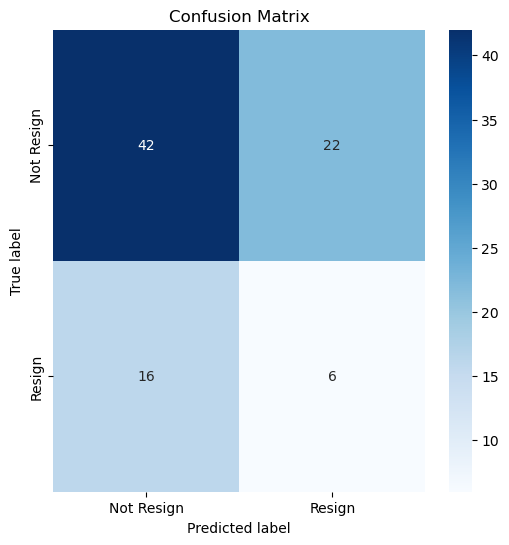

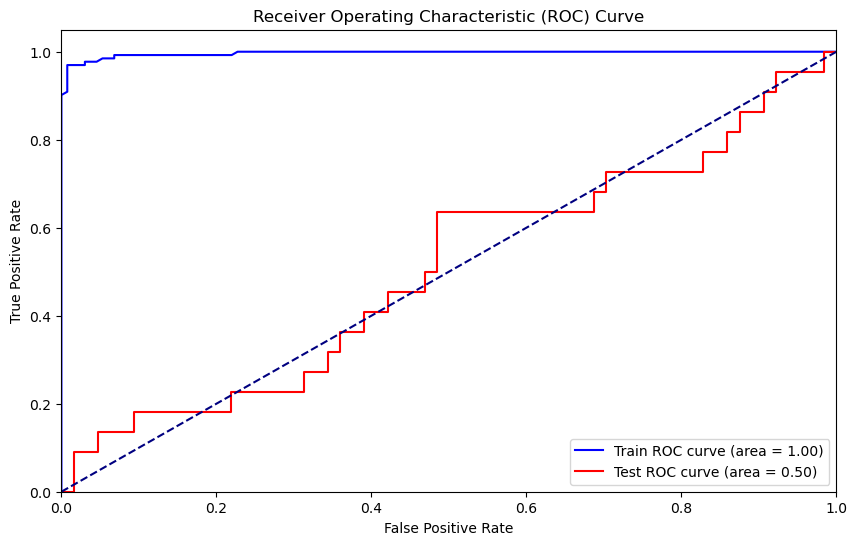

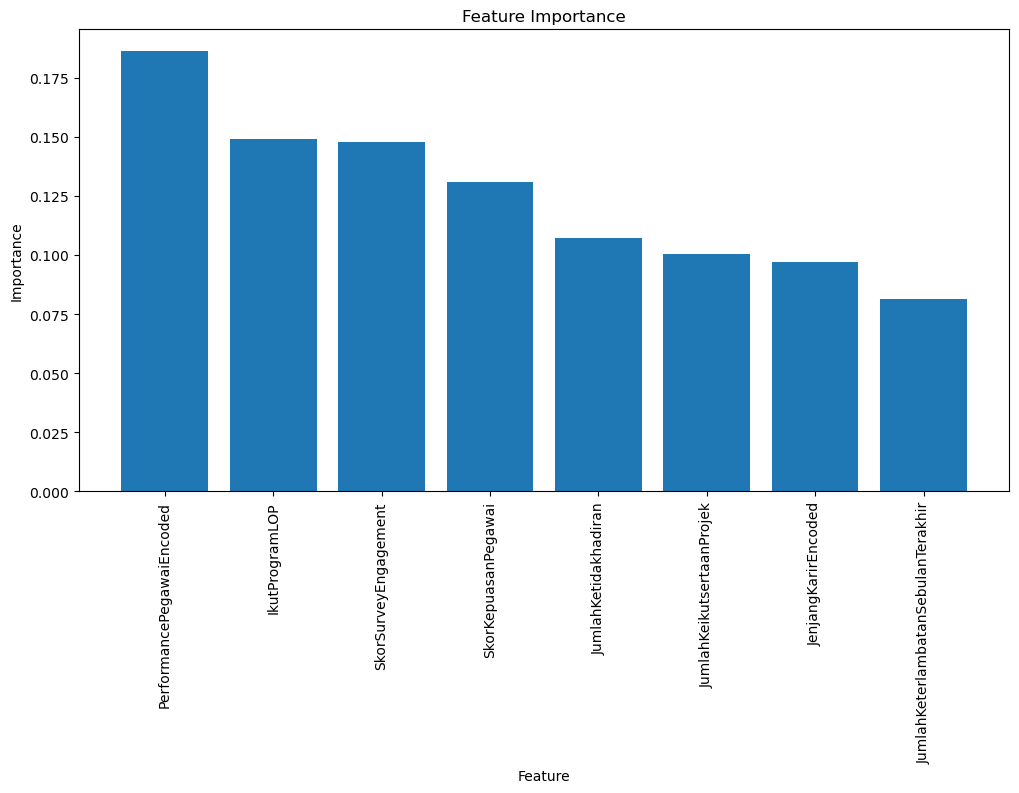

In [117]:
#visualisasi

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

#confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Resign', 'Resign'], yticklabels=['Not Resign', 'Resign'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

#ROC Curve
fpr_train, tpr_train, _ = roc_curve(y_train_SMOTE, y_pred_proba_train, pos_label=1)
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_proba_test, pos_label=1)
roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color='blue', label=f'Train ROC curve (area = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='red', label=f'Test ROC curve (area = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#Feature Importance
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Feature Importance')
plt.bar(range(X_train_SMOTE.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train_SMOTE.shape[1]), [X_train_SMOTE.columns[i] for i in indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

In [116]:
perf = {
    "Experiment": "Hyperparameter tuning (XGBoost)",
    "Accuracy": str(round(accuracy_test*100, 2))+'%',
    "Precision": str(round(precision_test*100, 2))+'%',
    "Recall": str(round(recall_test*100, 2))+'%',
    "AUC": str(round(auc_test*100, 2))+'%'
}

# Buat DataFrame dari kamus perf
perf_df = pd.DataFrame([perf])

# Tambahkan baris baru ke performance_log
performance_log = pd.concat([performance_log, perf_df], ignore_index=True)

# Tampilkan performance_log
print(performance_log)

                        Experiment Accuracy Precision  Recall     AUC
0                          XGBoost   61.63%    31.03%  40.91%  52.27%
1  Hyperparameter tuning (XGBoost)   55.81%    21.43%  27.27%  50.43%


Tingginya angka resign karyawan yang dapat mempengaruhi produktivitas dan biaya Perusahaan, maka dari itu perlu untuk mengidentifikasi faktor-faktor yang mempengaruhi resign karyawan untuk membuat strategi pencegahan yang efektif. XGBoost adalah algoritma machine learning yang digunakan untuk prediksi dan klasifikasi, sangat efektif dalam menangani data yang kompleks.

Jumlah performance pegawai menjadi fitur yang paling menentukan karyawan akan resign. Oleh karena itu, pihak HR perlu mempertimbangkan strategi untuk mengelola dan mengurangi angka resign dengan melakukan analisis dan penilaian kinerja yang lebih mendalam, serta meningkatkan dukungan dan pelatihan bagi karyawan. Dengan memanfaatkan model machine learning ini, kita dapat mengidentifikasi karyawan yang berisiko tinggi untuk resign dan menghemat biaya yang seharusnya dikeluarkan untuk merekrut dan melatih pengganti. Jika karyawan yang berisiko tinggi dapat dipertahankan dan diangkat menjadi karyawan tetap, kita tidak hanya mengurangi biaya, tetapi juga meningkatkan stabilitas tim dan produktivitas perusahaan.